# Анализ перспективности продаж компьютерных игр
Анализируем популяность игр относительно различных факторов (платформа, жанр, рейтинги и т.д)

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявлю определяющие успешность игры закономерности


# Изучаю данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas# импорт библиотеки pandas
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/datasets/games.csv')

### Загаловки столбцов иметю верхний регистор заменим, на нижний

In [3]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Убирем дубликаты

In [5]:
#df.drop_duplicates().reset_index()
df=df.drop_duplicates()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# Посмотрим на наличие дубликатов
df.duplicated().sum()

0

### Описание данных

•	name — название игры

•	platform — платформа

•	year_of_release — год выпуска

•	genre — жанр игры

•	na_sales — продажи в Северной Америке (миллионы проданных копий)

•	eu_sales — продажи в Европе (миллионы проданных копий)

•	jp_sales — продажи в Японии (миллионы проданных копий)

•	other_sales — продажи в других странах (миллионы проданных копий)

•	critic_score — оценка критиков (максимум 100)

•	user_score — оценка пользователей (максимум 10)

•	rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Посмотрим на уникальные значения в столбцах

### Расмотрим столбец name — название игры

In [7]:
# 2-ва значения пропущены почему и как их найти?
list_name=df['name'].unique() 
display(list_name)


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [8]:
print('Кол-во пропусков в играх ',df['name'].isna().sum())
print('Кол-во игр',len(df['name']))
print('Кол-во уникальных названий игр',len(df['name'].unique()))

Кол-во пропусков в играх  2
Кол-во игр 16715
Кол-во уникальных названий игр 11560


#### Вывод как видно кол-во уникальных названий игр отличается от общего кол-ва игр, это значит, что некотрые названия игр повторяются и из этими строками можно восполнить пропущеные данные

In [9]:
critic_score=df['critic_score'].unique() 
critic_score.sort()
critic_score

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

### Столбец year_of_release

In [10]:
print('Столбец year_of_release имеет пропусков =',df['year_of_release'].isna().sum())
print('Кол-во уникальных дат',len(df['year_of_release'].unique()))

Столбец year_of_release имеет пропусков = 269
Кол-во уникальных дат 38


#### Вывод значения столбца year_of_release можно заменить на значения из других столбцов, где нет пропусков, эту гипотизу проверю в дальнейшем

### Посмотрим на столбец rating

In [11]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
print('Кол-во уникальный рейтингов',len(df['rating'].unique()))

Кол-во уникальный рейтингов 9


#### В столбце rating имеется 9 уникальных значений

### Посмотрю на столбец user_score	

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

#### Как видно из уникальных значений столбца user_score имеется значени tbd, выясним где оно чаще встречается

#### Рассмотрим рейтинги

In [14]:
df_tbd=df.query('user_score=="tbd"')
df_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


#### Посмотрим на название игры  name

In [15]:
list_tbd=df_tbd['name'].unique()
list_tbd

array(['Zumba Fitness', 'Namco Museum: 50th Anniversary',
       'Zumba Fitness 2', ..., 'Mega Brain Boost', 'Plushees',
       'Men in Black II: Alien Escape'], dtype=object)

In [16]:
list_name=df['name'].unique()
list_name

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [17]:
#Запишу в отдельный список значения которые присутствуют в обоих листах list_name и list_tbd


print('Вывод Разница между кол-вом названий игр в общей таблице и таблицей где user_score=ttd=',len(df['name'].unique())-len(df_tbd['name'].unique()))

Вывод Разница между кол-вом названий игр в общей таблице и таблицей где user_score=ttd= 9619


#### Посмотрим на платформу platform

In [18]:
list_tbd_platform=df_tbd['platform'].unique()
list_tbd_platform

array(['Wii', 'PS2', 'GBA', 'PC', 'DS', 'PS', 'XB', 'X360', 'PS3', 'GC',
       'PSP', '3DS', 'WiiU', 'XOne', 'PSV', 'PS4'], dtype=object)

In [19]:
df_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [20]:
print('Вывод Разница между кол-вом платформ общей таблицы и таблицей где user_score=ttd=',len(df['platform'].unique())-len(df_tbd['platform'].unique()))

Вывод Разница между кол-вом платформ общей таблицы и таблицей где user_score=ttd= 15


Интересно платформы как нибудь влияют на значение рейтинга tbd

In [21]:
# Рассмотрим какие платформы отсутствуют при значении рейтинга от пользователей =tbd
list_df_platform=df['platform'].unique()
list_tdb_platform=df_tbd['platform'].unique()
list_tdb_platform=[]# в данной переменой буду хранить платформы у которых в значении рейтинга от пользователей нет параметра tbd
for i in range(0,len(list_df_platform)):
    flag=0
    value=list_df_platform[i]
    for y in range(0,len(list_tdb_platform)):
        check=list_tdb_platform[y]
        if value==check:
            flag=1
    if flag==0:
        list_tdb_platform.append(value)
print('Платформы у которых нет tbd в столбце user_score',list_tdb_platform)       

Платформы у которых нет tbd в столбце user_score ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


#### Кол-во платформ 31

In [22]:
df_tbd['platform'].unique()

array(['Wii', 'PS2', 'GBA', 'PC', 'DS', 'PS', 'XB', 'X360', 'PS3', 'GC',
       'PSP', '3DS', 'WiiU', 'XOne', 'PSV', 'PS4'], dtype=object)

#### Вывод Платформы у которых нет tbd в столбце user_score ['GB', 'N64', 'SNES', 'DC', 'SAT', 'GEN', 'WS', 'NG', 'SCD', 'TG16', 'NES', '3DO', 'PCFX']

#### Посмотрим на рейтинги

In [23]:
list_tbd_rating=df_tbd['rating'].unique()
list_tbd_rating

array(['E', 'E10+', 'T', nan, 'M', 'EC'], dtype=object)

In [24]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
len(df['rating'].unique())

9

Расмотрю как данный рейтинг влияет на значение столбца user_score =tbd 

In [26]:
# Рассмотрим какие платформы отсутствуют при значении рейтинга от пользователей =tbd
list_df_platform=df['rating'].unique()
list_tdb_platform=df_tbd['rating'].unique()
list_tdb_rating=[]# в данной переменой буду хранить платформы у которых в значении рейтинга от пользователей нет параметра tbd
for i in range(0,len(list_df_platform)):
    flag=0
    value=list_df_platform[i]
    for y in range(0,len(list_tdb_platform)):
        check=list_tdb_platform[y]
        if value==check:
            flag=1
    if flag==0:
        list_tdb_rating.append(value)
print('Рейтинги у которых нет tbd в столбце user_score',list_tdb_rating)  

Рейтинги у которых нет tbd в столбце user_score [nan, 'K-A', 'AO', 'RP']


#### Вывод Всего 9 рейтингов в столбце rating

####  Вывод Рейтинги у которых нет tbd в столбце user_score [nan, 'K-A', 'AO', 'RP']

#### Посмотрим на critic_score-оценка критиков

In [27]:
tbd_critic_score=df['critic_score'].unique()
tbd_critic_score.sort()
tbd_critic_score

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [28]:
# Рассмотрим какие платформы отсутствуют при значении рейтинга от пользователей =tbd
list_df_platform=df['critic_score'].unique()
list_tdb_platform=df_tbd['critic_score'].unique()
list_tdb_critic_score=[]# в данной переменой буду хранить платформы у которых в значении рейтинга от пользователей нет параметра tbd
for i in range(0,len(list_df_platform)):
    flag=0
    value=list_df_platform[i]
    for y in range(0,len(list_tdb_platform)):
        check=list_tdb_platform[y]
        if value==check:
            flag=1
    if flag==0:
        list_tdb_critic_score.append(value)
     
print('Рейтинги от организации ESRB у которых нет tbd в столбце user_score',list_tdb_critic_score)  

Рейтинги от организации ESRB у которых нет tbd в столбце user_score [nan, 91.0, 97.0, 95.0, 94.0, 93.0, 98.0, 96.0, 92.0, 25.0, 29.0, 20.0, 19.0, 24.0, 21.0, 17.0, 22.0, 13.0]


#### Вывод Рейтинги от организации ESRB у которых нет tbd в столбце user_score в основном имеют высокие значения выше 92, 

####  Вывод Оценки критиков распределяются от 13 до 90

#### Вывод Оценки пользователей распределяются от 0до 10

#### Посмотрим на столбец genre

In [29]:
list_tbd_genre=df_tbd['genre'].unique()
list_tbd_genre.sort()
list_tbd_genre

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [30]:
list_genre=df['genre'].unique()
list_genre

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [31]:
print('Разница между кол-вом жанров общей таблицы и таблицей где user_score=ttd',len(df['genre'].unique())-len(df_tbd['genre'].unique()))

Разница между кол-вом жанров общей таблицы и таблицей где user_score=ttd 1


In [32]:
print('Всего жанров =',len(df['genre'].unique()))

Всего жанров = 13


#### Вывод Во всех жанрах встречается user_score=ttd

#### Вывод Кол-во жанров 12

#### Посмотрим на продажи в различных странах

Рассмотрю регионы где чаще встречаются значения в столбце  user_score=tbd 

In [33]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [34]:
df_jp_sales=df.query('user_score=="tbd"')
if len(df_jp_sales)==0:
    df_jp_sales

In [35]:
if len(df_jp_sales)==0:
    df_jp_sales

In [36]:
df_jp_sales=df.query('eu_sales>0 and user_score=="tbd"')
if len(df_jp_sales)==0:
    df_jp_sales

In [37]:
df_jp_sales=df.query('na_sales>0 and user_score=="tbd"')
if len(df_jp_sales)==0:
    df_jp_sales

In [38]:
df_jp_sales=df.query('other_sales>0 and user_score=="tbd"')
if len(df_jp_sales)==0:
    df_jp_sales

#### Вывод Во всех странах имеются значения в столбце user_score=="tbd"

#### Вывод по отсутствию значению tbd в столбце user_score

1) платформы у которых отсутсвуют 'GB', 'N64', 'SNES', 'DC', 'SAT', 'GEN', 'WS', 'NG', 'SCD', 'TG16', 'NES', '3DO', 'PCFX'

2) Рейтинг критков в основном имеют высокие значения выше 92, 

3) рейтинг от организации ESRB  'K-A', 'AO', 'RP'

Четкой взаимосвязи не нашел, но в интернете нашел расшифрофку абревиатуры tbd =To Be Determined, то есть "Будет определено".  

# Подготовка данных

## В столбце platform привожу значение к нижнему регистру

In [39]:
df['platform']=df['platform'].str.lower()

In [40]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## В столбце year_of_release нет смысла менять формат на дату и затем получать значение года, потому что формат измениться на float

In [41]:
#df['year_of_release'] = pd.to_datetime(
#    df['year_of_release'], format='%Y')
#df['year_of_release']=pd.DatetimeIndex(df['year_of_release']).year

### Имеется очень много дубликатов по названию игры

In [42]:
# Данный код ищит дубликаты в столбце name
A = df['name']
counter = {}

for elem in A:
    counter[elem] = counter.get(elem, 0) + 1

doubles = {element: count for element, count in counter.items() if count > 1}

print(doubles)
print('Кол-во дубликатов',len(doubles))

{'Super Mario Bros.': 2, 'Tetris': 2, 'Grand Theft Auto V': 5, 'Grand Theft Auto: San Andreas': 4, 'Super Mario World': 2, 'Super Mario Bros. 3': 2, 'Grand Theft Auto: Vice City': 2, 'Call of Duty: Modern Warfare 3': 4, 'Call of Duty: Black Ops 3': 5, 'Call of Duty: Black Ops': 5, 'Call of Duty: Black Ops II': 4, 'Call of Duty: Modern Warfare 2': 3, 'Grand Theft Auto III': 2, 'Super Mario 64': 2, 'Grand Theft Auto IV': 3, 'Call of Duty: Ghosts': 6, 'Just Dance 3': 3, 'Call of Duty 4: Modern Warfare': 4, 'Donkey Kong Country': 3, 'Minecraft': 6, 'The Elder Scrolls V: Skyrim': 5, 'FIFA 16': 5, 'Halo 2': 2, 'FIFA Soccer 13': 8, 'The Sims 3': 6, 'Mario & Sonic at the Olympic Games': 2, 'Star Wars Battlefront (2015)': 3, 'Pac-Man': 2, 'Grand Theft Auto: Liberty City Stories': 2, 'Call of Duty: Advanced Warfare': 5, 'The Legend of Zelda: Ocarina of Time': 2, 'FIFA 17': 5, 'Super Smash Bros. for Wii U and 3DS': 2, 'Call of Duty: World at War': 5, 'Battlefield 3': 3, 'Need for Speed Undergroun

<div class="alert alert-block alert-warning">
<b>Комментарий от ревьюера</b>

Можно просто посмотреть дубликаты на определенные столбцы, чтобы не писать много кода. :) 

</div>

In [43]:
df['name'].str.lower().duplicated().sum()

5155

In [44]:
doubles

{'Super Mario Bros.': 2,
 'Tetris': 2,
 'Grand Theft Auto V': 5,
 'Grand Theft Auto: San Andreas': 4,
 'Super Mario World': 2,
 'Super Mario Bros. 3': 2,
 'Grand Theft Auto: Vice City': 2,
 'Call of Duty: Modern Warfare 3': 4,
 'Call of Duty: Black Ops 3': 5,
 'Call of Duty: Black Ops': 5,
 'Call of Duty: Black Ops II': 4,
 'Call of Duty: Modern Warfare 2': 3,
 'Grand Theft Auto III': 2,
 'Super Mario 64': 2,
 'Grand Theft Auto IV': 3,
 'Call of Duty: Ghosts': 6,
 'Just Dance 3': 3,
 'Call of Duty 4: Modern Warfare': 4,
 'Donkey Kong Country': 3,
 'Minecraft': 6,
 'The Elder Scrolls V: Skyrim': 5,
 'FIFA 16': 5,
 'Halo 2': 2,
 'FIFA Soccer 13': 8,
 'The Sims 3': 6,
 'Mario & Sonic at the Olympic Games': 2,
 'Star Wars Battlefront (2015)': 3,
 'Pac-Man': 2,
 'Grand Theft Auto: Liberty City Stories': 2,
 'Call of Duty: Advanced Warfare': 5,
 'The Legend of Zelda: Ocarina of Time': 2,
 'FIFA 17': 5,
 'Super Smash Bros. for Wii U and 3DS': 2,
 'Call of Duty: World at War': 5,
 'Battlefield

In [45]:
df.query('name=="Need for Speed Underground 2"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
113,Need for Speed Underground 2,ps2,2004.0,Racing,2.71,3.02,0.08,1.09,82.0,8.6,E
696,Need for Speed Underground 2,xb,2004.0,Racing,1.38,0.80,0.00,0.10,77.0,8.7,E
1800,Need for Speed Underground 2,gc,2004.0,Racing,0.70,0.39,0.01,0.03,NaN,NaN,NaN
4473,Need for Speed Underground 2,gba,2004.0,Racing,0.31,0.12,0.00,0.01,72.0,8.2,E
9357,Need for Speed Underground 2,ds,2005.0,Racing,0.11,0.02,0.00,0.01,65.0,7,E
11805,Need for Speed Underground 2,pc,2004.0,Racing,0.00,0.06,0.00,0.01,82.0,8.5,T


### Вывод пропущеные года выпусков не восполнить, потому что игры с одним и тем же названием могут быть выпущены на разных платформах иметь различные рейтинги и продажи

##  В столбце user_score заменить тип данных на float не получается, потому что имеется значине 'tbd', посмотрим на даные с этими значениями

## Меняю значение tbd на Nan 

In [46]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [47]:
df['user_score']=df['user_score'].replace('tbd',np.nan)

In [48]:
df = df.astype({'user_score': np.float})


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [50]:
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411,-0.267851
na_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755,0.086200
eu_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752,0.055337
jp_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593,0.125598
other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554,0.057119
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


### Вывод  хорошей корреляцией в колонке user_score не нашел, по этому не буду заменять tbd на среднии. Заметна хорошая корреляция между продажами в Европе и Северной Америке и другими странами,

## Подсчитаю суммарные продажи в различных регионах и запишу в отдельную колонку

In [51]:
def sum_sales(row):
    value_na_sales=row['na_sales']
    value_eu_sales=row['eu_sales']
    value_jp_sales=row['jp_sales']
    value_other_sales=row['other_sales']
    sum_values=value_na_sales+value_eu_sales+value_jp_sales+value_other_sales
    return sum_values
df['sales_sum']=df.apply(sum_sales,axis=1)

In [52]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


##  Рассмотрим rating
«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Игры, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «E».

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году.

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Примером может являться Rise of the Argonauts.

«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Из последних игр это Saboteur, Left 4 Dead 2.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Не знаю ни одной игры с таким рейтингом, если вспомните - скажите.

«RP» ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

#### Так как «RP» ( «Rating Pending»») — «Рейтинг ожидается», заменю значение на NAN

In [53]:
df['rating']=df['rating'].replace('RP',np.nan)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,x360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,gba,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [54]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

# 3.1 Посмотрю, сколько игр выпускалось в разные годы. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03d8709710>,
      dtype=object)

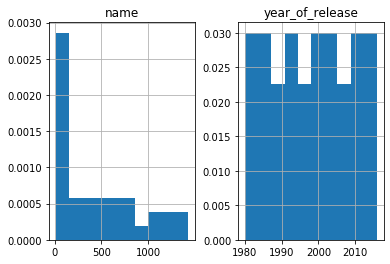

In [55]:
df.groupby('year_of_release')['name'].count().reset_index().hist(density=True)

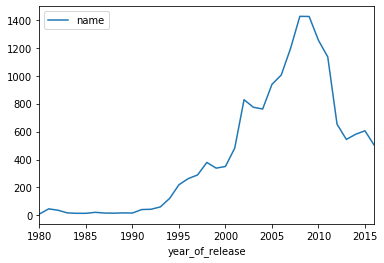

In [56]:
df.groupby('year_of_release')['name'].count().reset_index().plot(x='year_of_release',y='name')

In [57]:
df=df.query('year_of_release>1993')

### Вывод как видно кол-во новых игр стало рости с 1993г, но в 2008г стало падать. Уверен, что данные до 1995 года не актуальны по нескольким причинам
1) до 1995г было выпущено мало игр
2) игры которые были выпущены до 1995г сейчас не актуальны

1) В 2000 году вышла Sony PlayStation 2

2) Интернет вошел в индустрию игр

# Посмотрю, как менялись продажи по платформам. 

In [58]:
df_platform=df.pivot_table(index='platform',values='sales_sum',aggfunc='sum').reset_index().sort_values(by='sales_sum',ascending=False)
df_platform.head(5)

,platform,sales_sum
14,ps2,1233.56
26,x360,961.24
15,ps3,931.34
23,wii,891.18
3,ds,802.76


### Вывод самые популярные платформы PS2,X360,PS3. Менее популярные PCFX, 3DO, NES

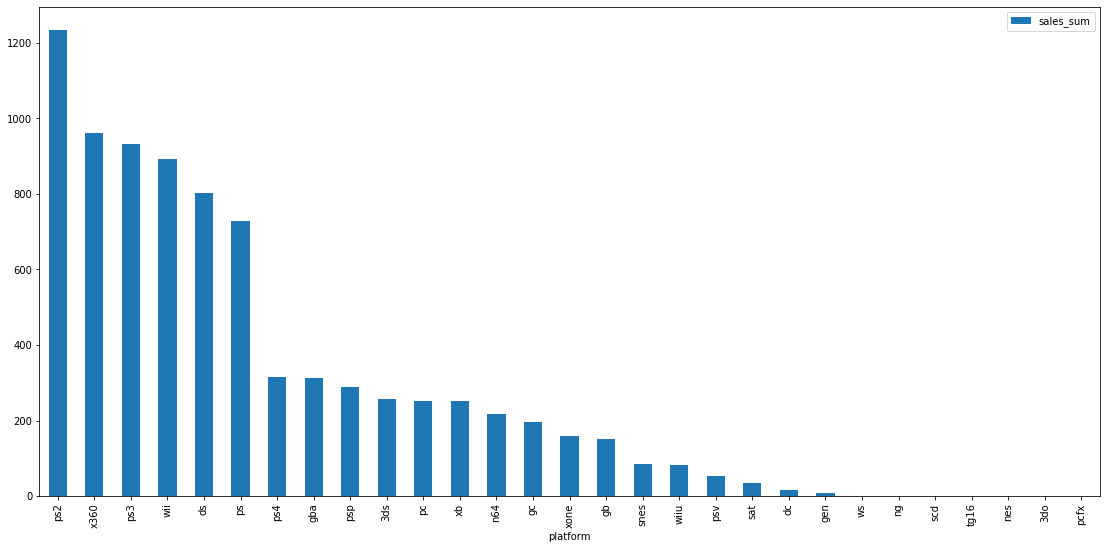

In [59]:
df_platform.plot(kind='bar',x='platform',y='sales_sum',figsize=(19, 9))

Выбиру  платформ с наилучшими продажами из 50 строк, что бы включились платформы из df_platform- рейтинг платформ

In [61]:
df_sales_sum=df.query('platform=="ps2" or platform=="x360" or platform=="ps3" or platform=="wii" or platform=="ds"')

#### Вывод Когда выходит новая платформа, у нее хорошие продажи и  в дальнейшем продажи падают и немного подростают. Цикл жизни платформ состовляет 2-4 года лидером 2006-2009 был Wii, в 2011-2015  х360 и PS3 и видно, что зарождается тренд PS4. Так же видно, что продажи с 2011года стали меньше по сравнению с предыдущими годами.  В лучшию тройку продаж входят платформы PS2,X360,PS3. Менее популярные PCFX, 3DO, NES

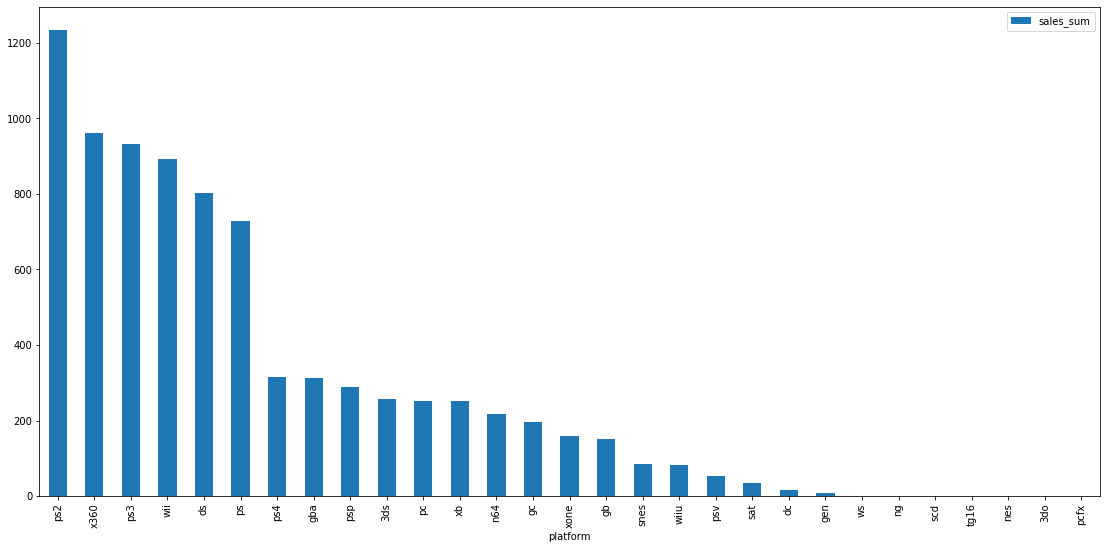

In [64]:
df_platform.plot(kind='bar',x='platform',y='sales_sum',figsize=(19, 9))

### Время жизни платформ

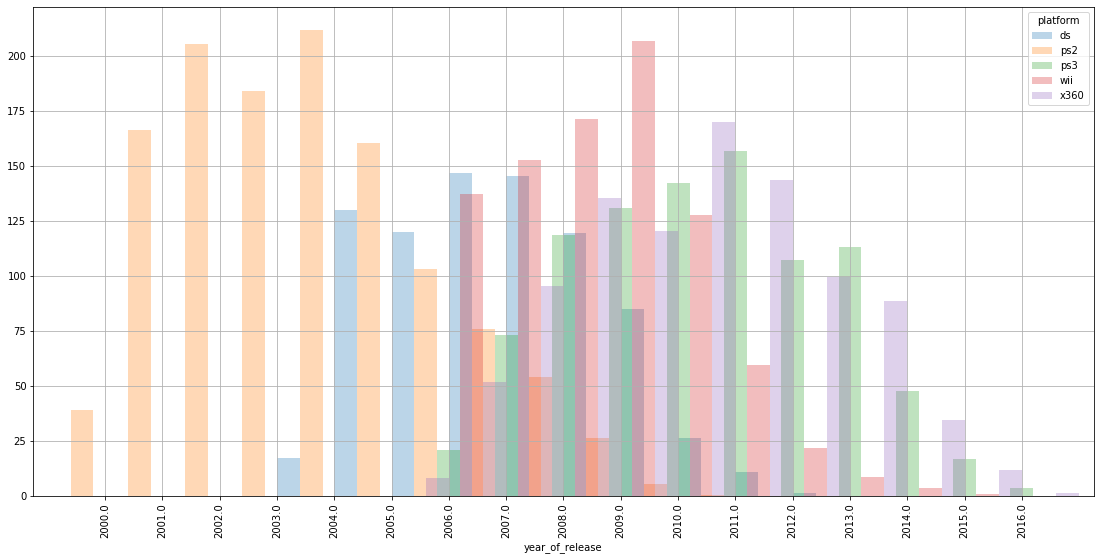

In [65]:
df_platform=df_sales_sum.pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar', grid='True',figsize=(19, 9),width=2,alpha=0.3)

#### Платформа PS2

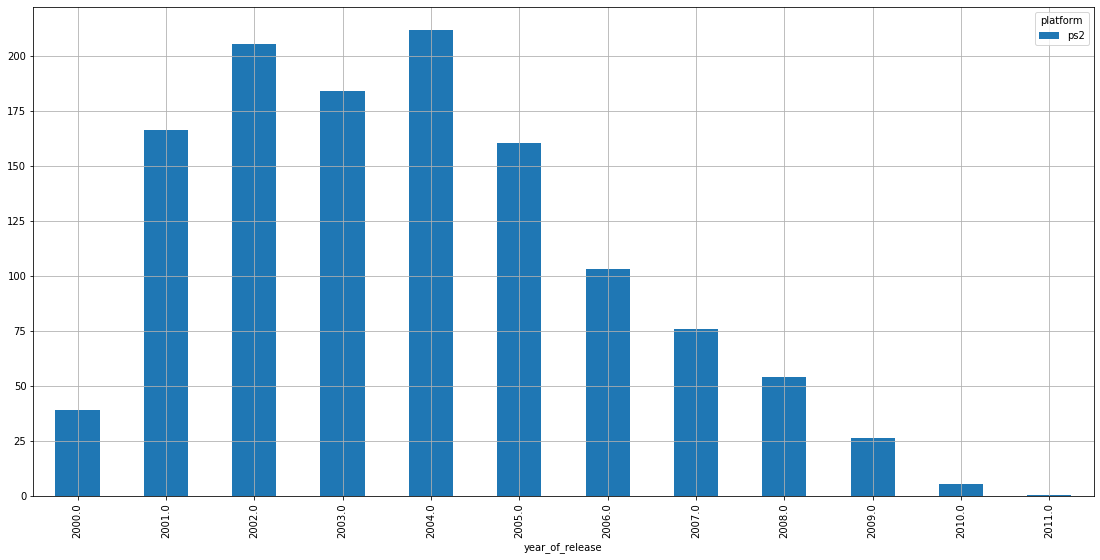

In [66]:
df_platform=df.query('platform=="ps2"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

##### Вывод после хорошего роста, продажи были приблизительно на одном уровне в течении 4-х лет затем спад. Платформа просущиствовала 11 лет

#### Платформа PS3

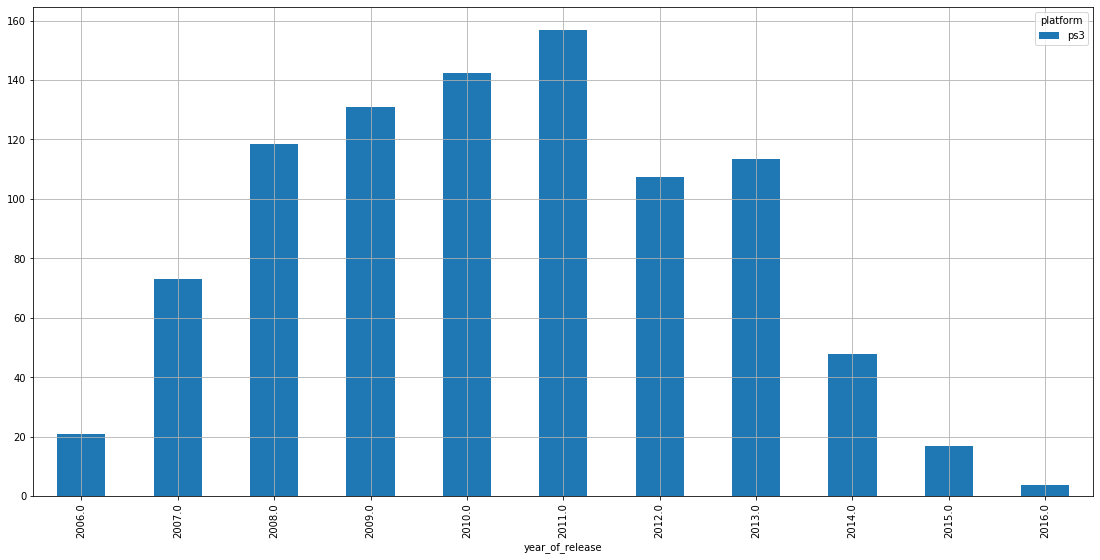

In [67]:
df_platform=df.query('platform=="ps3"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

Продажи платформы ps3 5 лет подряд росли, затем спад продаж. Платформа ps3 просущиствовала 10 лет

#### Платформа ds

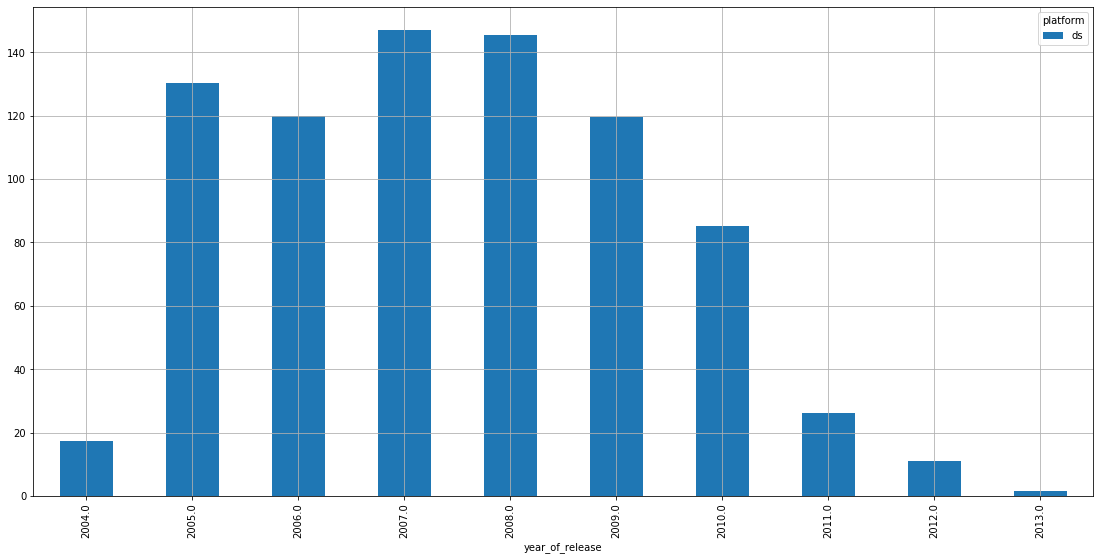

In [68]:
df_platform=df.query('platform=="ds"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

После появления через 2-ва года платформа ds продажи были приблизительно на одном уровне 5 лет , затем спад. Платформа просуществовала 9 лет

#### Платформа WII

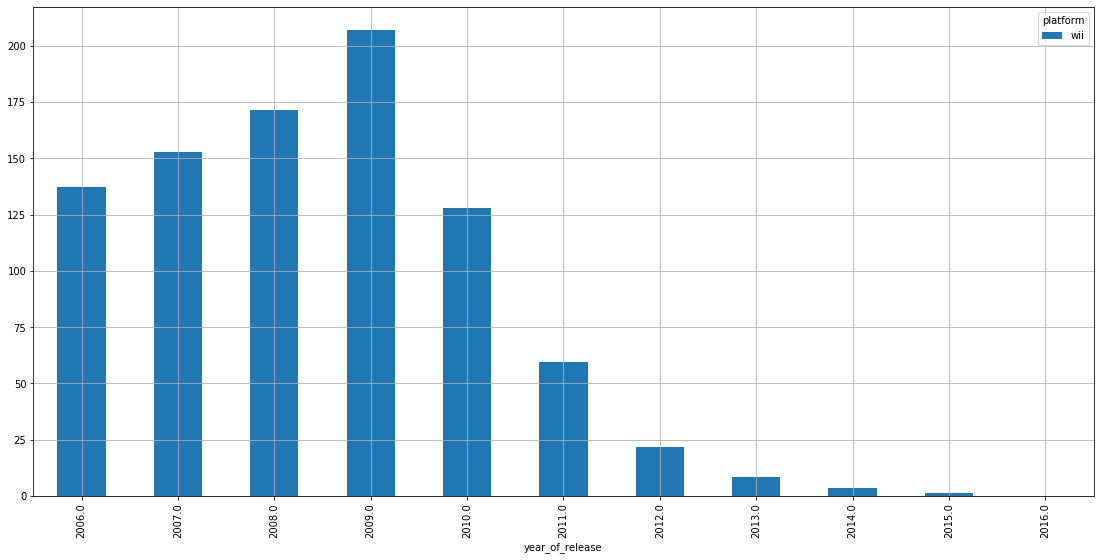

In [69]:
df_platform=df.query('platform=="wii"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

#### Платформа x360

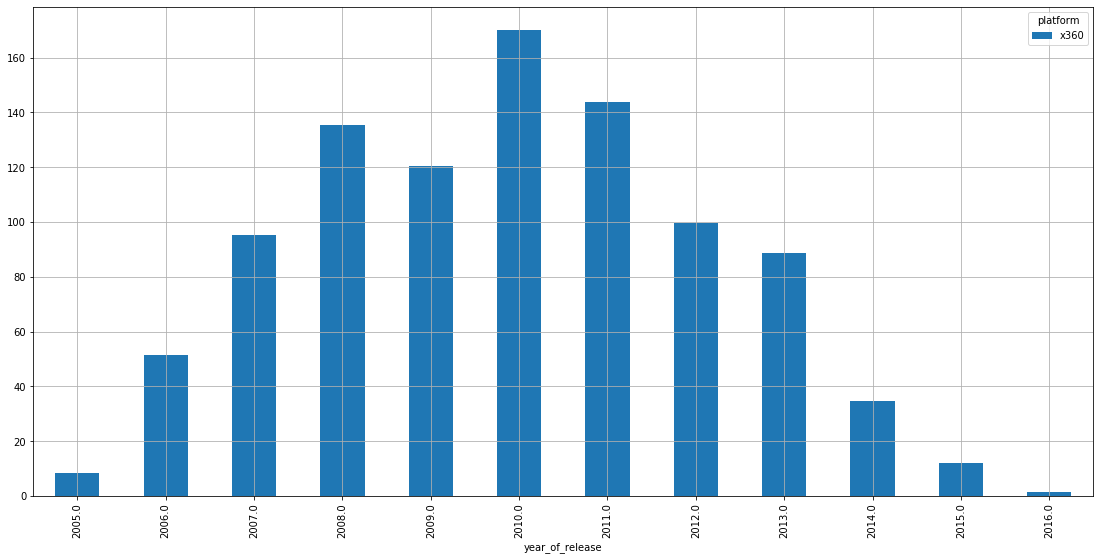

In [70]:
df_platform=df.query('platform=="x360"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

### Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [71]:
df_platform=df_sales_sum.pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')

In [72]:
df_platform

platform,ds,ps2,ps3,wii,x360
year_of_release,,,,,
2000.0,NaN,39.17,NaN,NaN,NaN
2001.0,NaN,166.43,NaN,NaN,NaN
2002.0,NaN,205.38,NaN,NaN,NaN
2003.0,NaN,184.31,NaN,NaN,NaN
2004.0,17.27,211.81,NaN,NaN,NaN
2005.0,130.14,160.66,NaN,NaN,8.25
2006.0,119.81,103.42,20.96,137.15,51.62
2007.0,146.94,75.99,73.19,152.77,95.41
2008.0,145.31,53.90,118.52,171.32,135.26


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


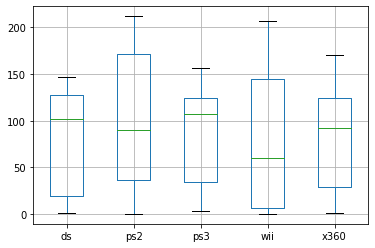

In [73]:

df_platform.boxplot()

Как видно из графифоков продажи платформ ТОП 5 были с 2000 года, по этому для анализа буду рассматривать данные начиная с этого периода

#### Вывод по платформа
в среднем уровень продаж у выбраных платформ приблизительно на одном уровне  Платформа PS2,PS3, PS4 Сменяют друг друга, через каждые 10 лет

## Вывод по платформам Продажи у платформ различаются самые популярные 

# Фильтрую данные, что бы начинались с 2013г

In [74]:

df=df.query('year_of_release>=2013')


In [75]:
df_sales_sum

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,ds,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,ds,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,ds,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,ps2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [76]:
df_platform=df.pivot_table(index='platform',values='sales_sum',aggfunc='sum').reset_index().sort_values(by='sales_sum',ascending=False)
df_platform.head(5)

,platform,sales_sum
4,ps4,314.14
3,ps3,181.43
10,xone,159.32
0,3ds,143.25
9,x360,136.80


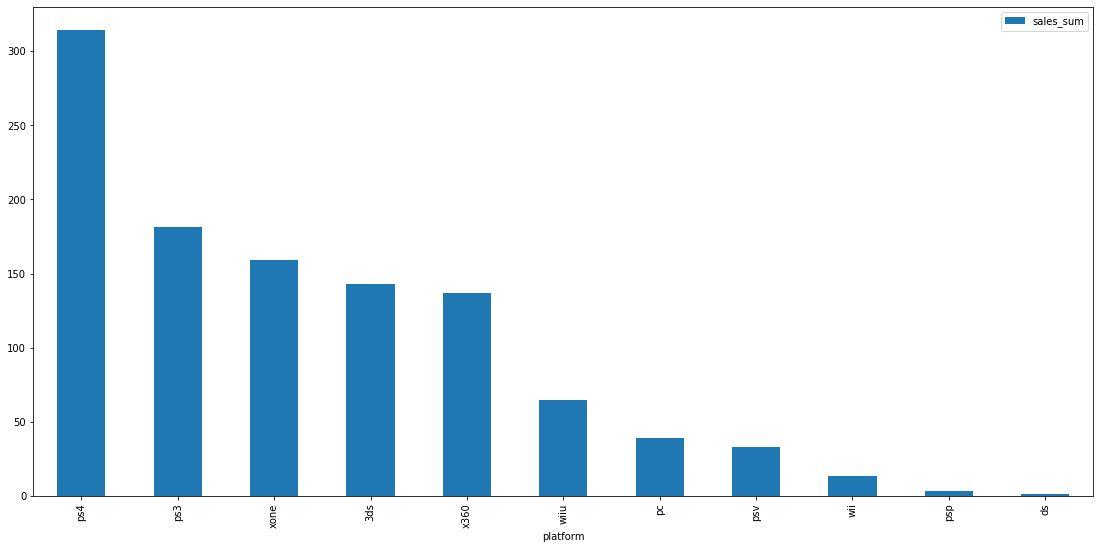

In [77]:
df_platform.plot(kind='bar',x='platform',y='sales_sum',figsize=(19, 9))


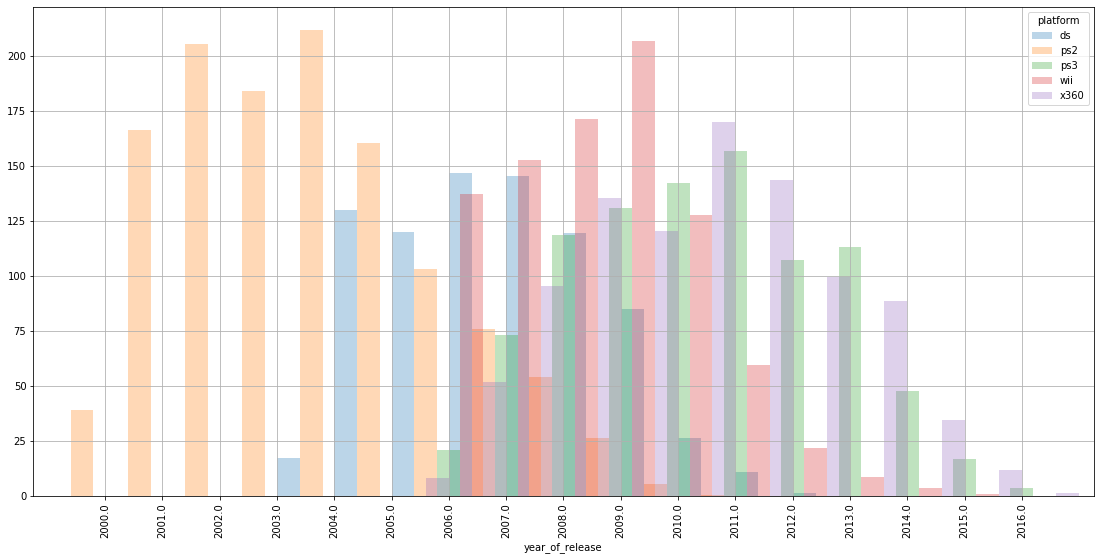

In [78]:
df_platform=df_sales_sum.pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar', grid='True',figsize=(19, 9),width=2,alpha=0.3)

## Рассмотрим более подробно период жизни каждой платформы из ТОП 5

### Платформа ps4

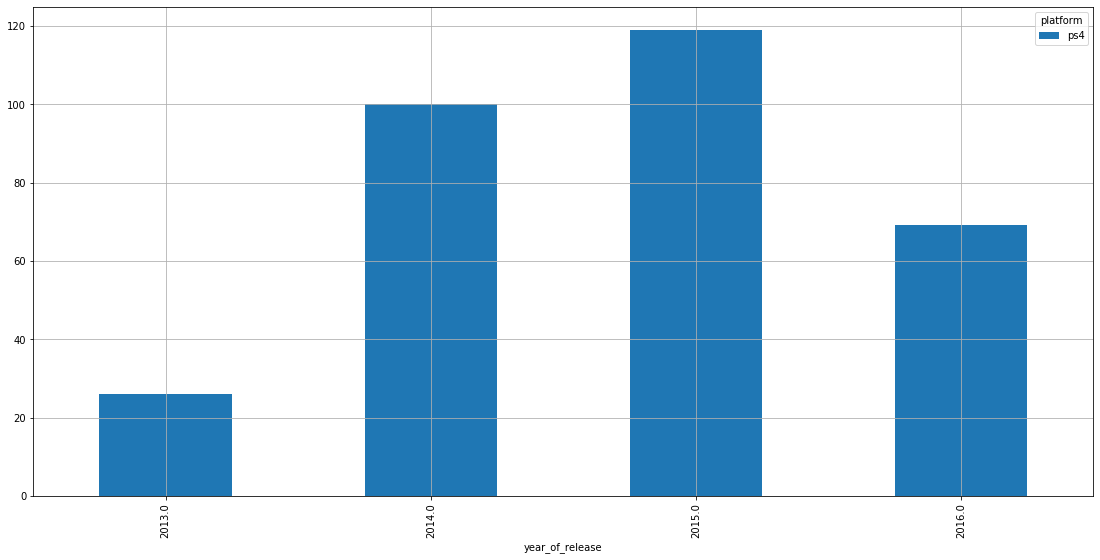

In [79]:
df_platform=df.query('platform=="ps4"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

Вывод как видно прадажи 3 года  росли, затем стали падать

### Платформа ps3

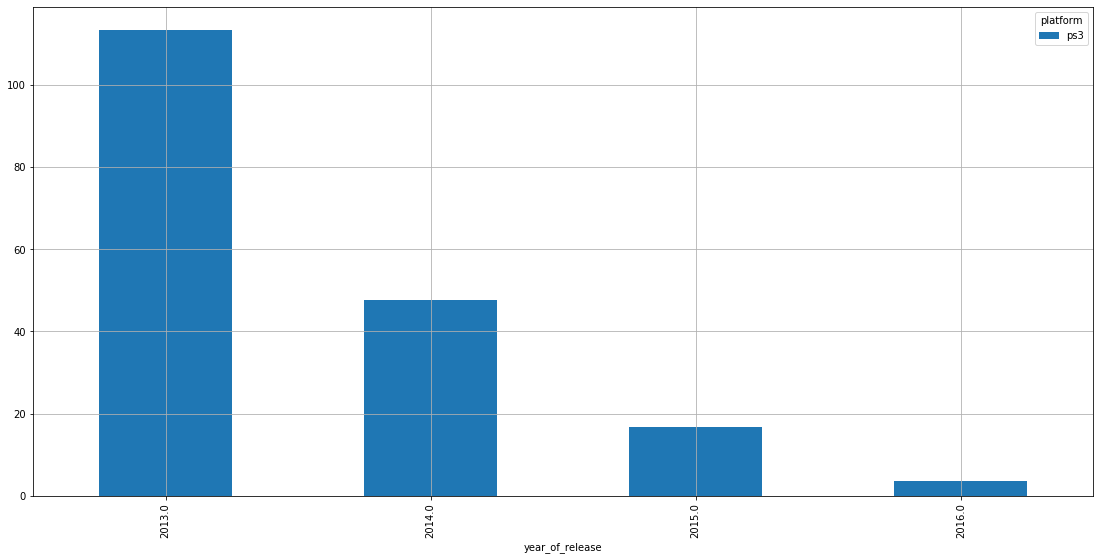

In [80]:
df_platform=df.query('platform=="ps3"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

Вывод  рассматривоемом периоде платформа теряла продажи

### Платформа xone

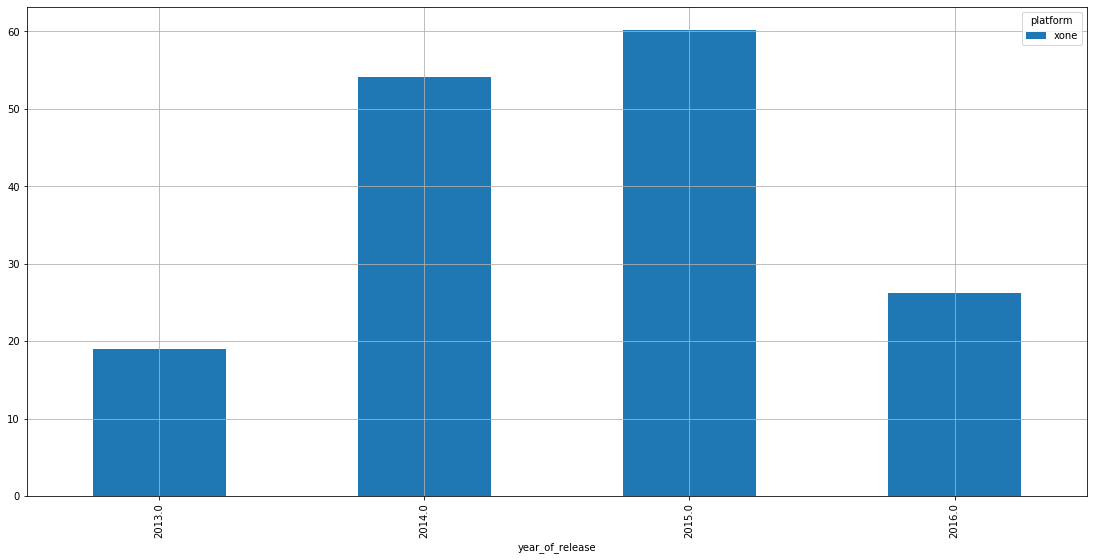

In [81]:
df_platform=df.query('platform=="xone"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

Вывод платформа по началу увеличивала продажи, затем они стали падать

### Платформа 3ds

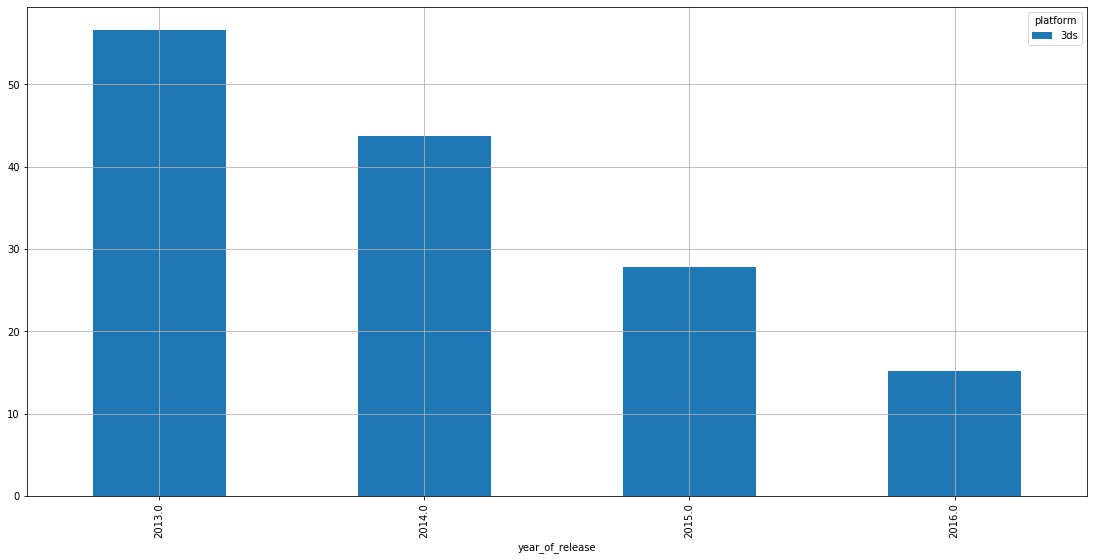

In [82]:
df_platform=df.query('platform=="3ds"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

Продажи падают

### Платформа x360

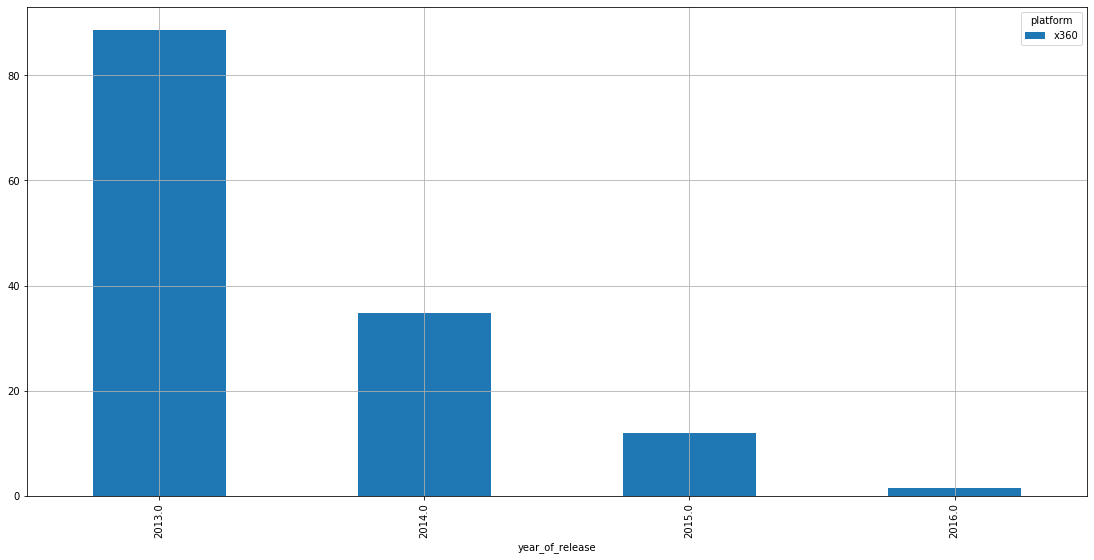

In [83]:
df_platform=df.query('platform=="x360"').pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
df_platform.plot(kind='bar',grid='True',figsize=(19, 9))

Продажи падают

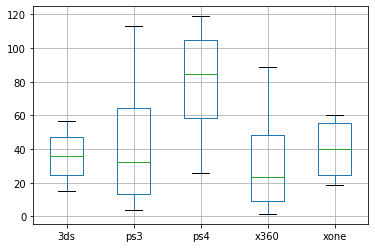

In [136]:
df_platform=df_sales_sum.pivot_table(index=['year_of_release'],values='sales_sum',columns='platform',aggfunc='sum')
#df_platform.plot(kind='bar', grid='True',figsize=(19, 9),width=2,alpha=0.3)
df_platform.boxplot()


# Фильтрану данные для ТОП 5 платформ

In [84]:
df_sales_sum=df.query('platform=="ps4" or platform=="ps3" or platform=="xone" or platform=="3ds" or platform=="x360"')

# Рассмотрим влияние на продажи популярных платформ отзывы критиков,пользователей и международный рейтинг

Отзывы критиков

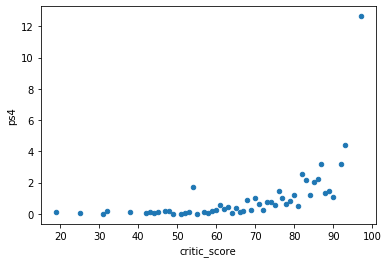

In [85]:
df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='critic_score',y='ps4')

Видна зависимость продаж от отзыва критиков

In [86]:
#df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean')['ps2'].plot(figsize=(19, 9))


Отзывы пользователей

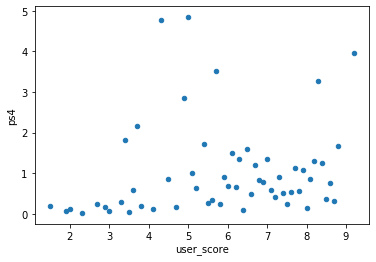

In [87]:
df_sales_sum.pivot_table(index=['user_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='user_score',y='ps4')

Зависимости нет между продажами и отзовами пользователей

In [88]:
#df_sales_sum.pivot_table(index=['user_score'],values='sales_sum',columns='platform',aggfunc='mean')['ps2'].plot(figsize=(19, 9))

## Сравню платформы из ТОП5

In [89]:
df_sales_sum.pivot_table(index=['rating'],values='sales_sum',columns='platform',aggfunc='mean').reset_index()

platform,rating,3ds,ps3,ps4,x360,xone
0,E,0.616410,0.823333,0.992037,0.646579,0.605333
1,E10+,0.283415,0.447500,0.549500,0.535625,0.463548
2,M,0.356667,1.330500,1.656711,1.174074,1.081429
3,T,0.443333,0.351212,0.523294,0.429259,0.418750


In [90]:
df['platform'].unique()

array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

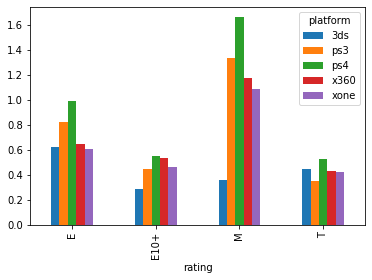

In [91]:
df_sales_sum.pivot_table(index=['rating'],values='sales_sum',columns='platform',aggfunc='mean').plot(kind='bar')

Как видно, очень хорошие продажи у рейтингов E, M и у них хорошо идут платформы  ps4, ps3,X360 

In [92]:
df_sales_sum.pivot_table(index=['user_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index()

platform,user_score,3ds,ps3,ps4,x360,xone
0,0.2,NaN,0.11,NaN,NaN,NaN
1,0.7,NaN,NaN,NaN,0.18,NaN
2,1.0,NaN,0.04,NaN,NaN,NaN
3,1.3,NaN,NaN,NaN,0.06,NaN
4,1.5,NaN,NaN,0.20,NaN,NaN
...,...,...,...,...,...,...
73,8.8,1.036667,NaN,1.66,NaN,0.01
74,8.9,3.100000,NaN,NaN,NaN,0.04
75,9.0,1.180000,0.41,NaN,NaN,NaN
76,9.1,NaN,5.86,NaN,NaN,NaN


Отзовы пользователей для платформы ps4

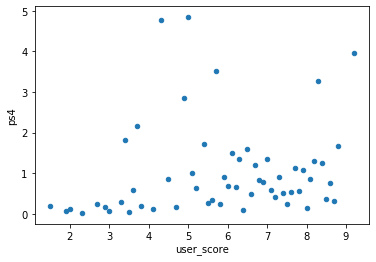

In [93]:
df_sales_sum.pivot_table(index=['user_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='user_score'
                                    ,y='ps4')

Для платформы ps4 нет четкой корреляции между продажами и оценкой пользователй

Отзовы пользователей для платформы ps4

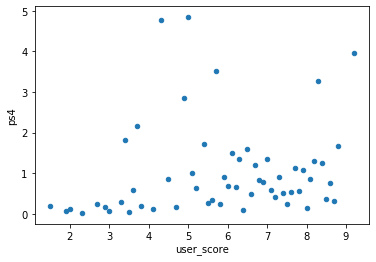

In [94]:
df_sales_sum.pivot_table(index=['user_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='user_score'
                                    ,y='ps4')

Для платформы ps4 имеются выбросы

Отзовы пользователей для платформы ps3

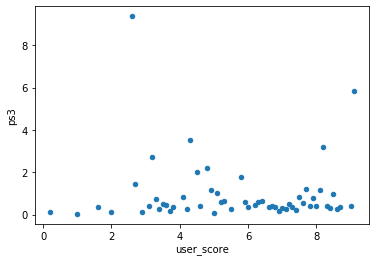

In [95]:
df_sales_sum.pivot_table(index=['user_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='user_score'
                                    ,y='ps3')

Отзовы пользователей для платформы x360

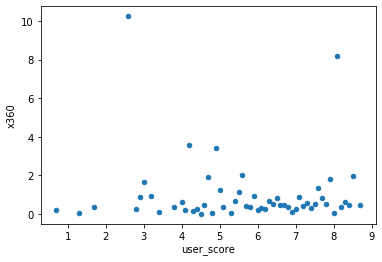

In [96]:
df_sales_sum.pivot_table(index=['user_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='user_score'
                                    ,y='x360')

Для платформы x360 имеются выбросы

In [97]:
df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index()

platform,critic_score,3ds,ps3,ps4,x360,xone
0,13.0,NaN,0.04,NaN,NaN,NaN
1,19.0,NaN,NaN,0.120,0.06,NaN
2,20.0,NaN,NaN,NaN,NaN,0.09
3,23.0,NaN,NaN,NaN,NaN,0.20
4,25.0,NaN,NaN,0.060,NaN,NaN
...,...,...,...,...,...,...
65,92.0,NaN,NaN,3.225,NaN,NaN
66,93.0,NaN,0.41,4.405,1.94,NaN
67,94.0,NaN,1.69,NaN,NaN,NaN
68,95.0,NaN,5.86,NaN,NaN,0.75


Отзовы критиков для платформы x360

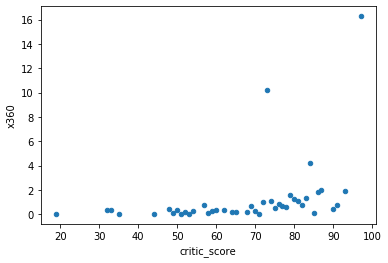

In [98]:
df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='critic_score'
                                    ,y='x360')

Для платформы x360 хорошая засимость балов критиков и продаж

Отзовы критиков для платформы ps4

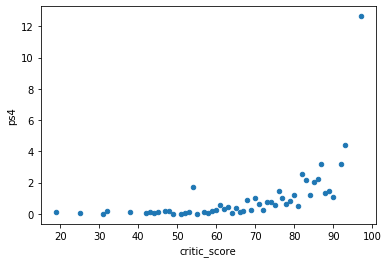

In [99]:
df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='critic_score'
                                    ,y='ps4')

Для платформы ps4 видно что продажи немного зависят от бала критиков

Отзовы критиков для платформы ps3

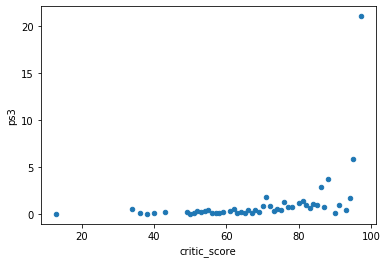

In [100]:
df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='critic_score'
                                    ,y='ps3')

Для платформы ps3 небольшая засимость балов критиков и продаж

Отзовы критиков для платформы xone

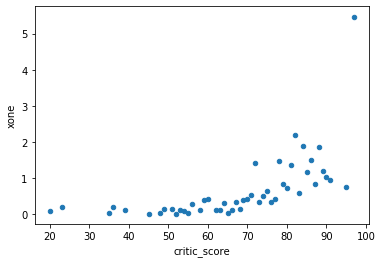

In [101]:
df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='critic_score'
                                    ,y='xone')

Отзовы критиков для платформы 3ds

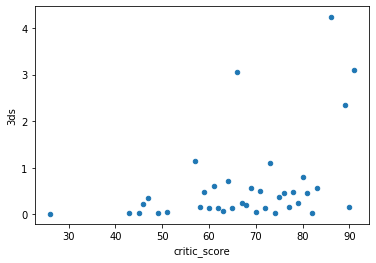

In [102]:
df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index().plot.scatter(x='critic_score'
                                    ,y='3ds')

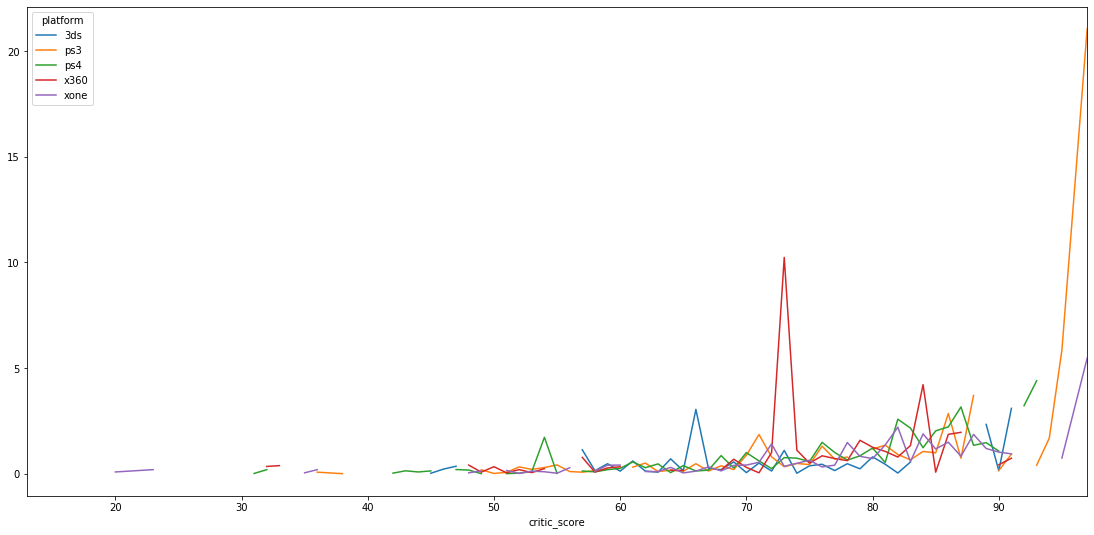

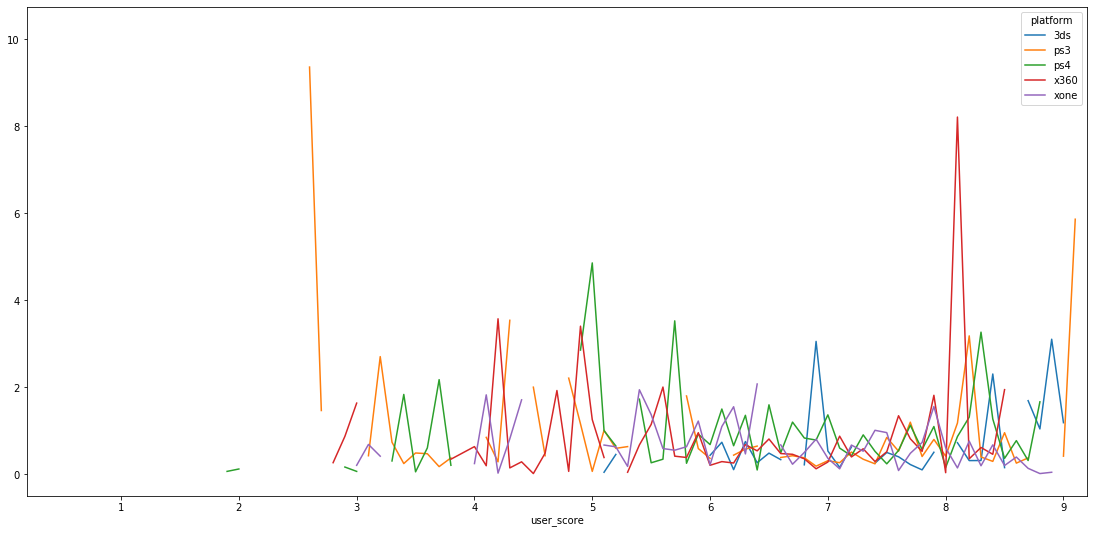

In [103]:
df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean').plot(figsize=(19, 9))
df_sales_sum.pivot_table(index=['user_score'],values='sales_sum',columns='platform',aggfunc='mean').plot(figsize=(19, 9))


## Рассмотрим наличие корреляции между отзывами и продажами

Зависимость между продажами и отзывами критиков

In [104]:
df_critic_score=df_sales_sum.pivot_table(index=['critic_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index()
df_critic_score.corr()

platform,critic_score,3ds,ps3,ps4,x360,xone
platform,,,,,,
critic_score,1.000000,0.414754,0.397001,0.550306,0.387833,0.606041
3ds,0.414754,1.000000,0.526451,0.319601,0.227641,0.267622
ps3,0.397001,0.526451,1.000000,0.899320,0.817679,0.843404
ps4,0.550306,0.319601,0.899320,1.000000,0.785222,0.862773
x360,0.387833,0.227641,0.817679,0.785222,1.000000,0.738740
xone,0.606041,0.267622,0.843404,0.862773,0.738740,1.000000


Зависимость между продажами и отзывами пользователей

In [105]:
df_critic_score=df_sales_sum.pivot_table(index=['user_score'],values='sales_sum',columns='platform',aggfunc='mean').reset_index()
df_critic_score.corr()

platform,user_score,3ds,ps3,ps4,x360,xone
platform,,,,,,
user_score,1.000000,0.397091,-0.041156,0.176559,-0.048967,-0.022356
3ds,0.397091,1.000000,-0.284652,-0.024202,-0.024637,-0.163612
ps3,-0.041156,-0.284652,1.000000,0.282279,0.615291,0.044407
ps4,0.176559,-0.024202,0.282279,1.000000,0.002589,-0.053858
x360,-0.048967,-0.024637,0.615291,0.002589,1.000000,-0.285947
xone,-0.022356,-0.163612,0.044407,-0.053858,-0.285947,1.000000


## Вывод нормальная корреляция между отзывыми и продажами у платформ xone и ps4, у остальных платформ хуже зависимость. При этом оценки пользователей не влияют на продажи

# Анализ отзывов(рейтингов)

In [106]:
df['rating'].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Игры, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «E».

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году.

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. Примером может являться Rise of the Argonauts.


«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Из последних игр это Saboteur, Left 4 Dead 2.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Не знаю ни одной игры с таким рейтингом, если вспомните - скажите.


«RP» ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.


## Расмотрю значение интервалов для общих продаж, для различных рейтингов

In [107]:
gr_rating3=df.pivot_table(index='rating',values='sales_sum', aggfunc='mean').sort_values(by='sales_sum', ascending=False)
gr_rating3

,sales_sum
rating,
M,1.007263
E,0.662781
E10+,0.457897
T,0.380240


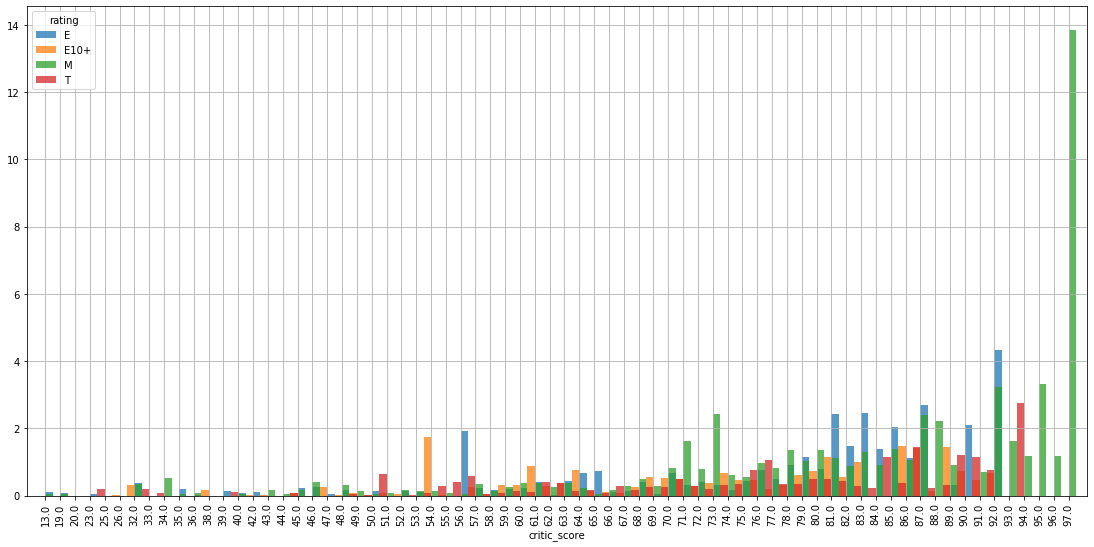

In [108]:
gr_score=df.pivot_table(index='critic_score',values='sales_sum',columns='rating', aggfunc='mean')
gr_score.plot(kind='bar', grid='True',figsize=(19, 9),width=2,alpha=0.75)

In [109]:
gr_score

rating,E,E10+,M,T
critic_score,,,,
13.0,NaN,NaN,0.0400,NaN
19.0,0.12,NaN,0.0600,NaN
20.0,0.09,NaN,NaN,NaN
23.0,NaN,NaN,NaN,0.200
25.0,0.06,NaN,NaN,NaN
...,...,...,...,...
93.0,4.32,NaN,1.6225,2.765
94.0,NaN,NaN,1.1750,NaN
95.0,NaN,NaN,3.3050,NaN


In [110]:
gr_score.describe()

rating,E,E10+,M,T
count,51.000000,48.000000,60.000000,49.000000
mean,0.678968,0.447069,0.940002,0.422139
std,0.879725,0.430024,1.860256,0.477698
min,0.010000,0.010000,0.040000,0.010000
25%,0.133333,0.108333,0.155625,0.145000
50%,0.315000,0.311000,0.400000,0.284375
75%,0.778988,0.615000,1.077898,0.488333
max,4.320000,1.730000,13.852500,2.765000


In [111]:
df.query('rating=="AO" or rating=="K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum


### Вывод самые лучшие продажи у рейтингов AO, K-A и М при этом у Рейтингов АО, при этом кол-во игр и платформ у них были минмиальные. Значит эти игры пользовались огромной популярностью, кроме Японии

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


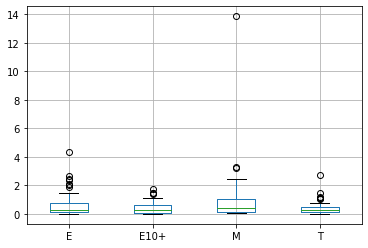

In [112]:
gr_score.boxplot()

In [113]:
gr_user_score=df.pivot_table(index='user_score',values='sales_sum', aggfunc='mean').reset_index().sort_values(by='sales_sum', ascending=False)

In [114]:
gr_user_score

,user_score,sales_sum
16,2.6,9.800000
81,9.1,6.475000
40,5.0,2.216000
82,9.2,1.790000
39,4.9,1.788889
...,...,...
9,1.9,0.060000
3,1.3,0.060000
2,1.0,0.040000
4,1.4,0.015000


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


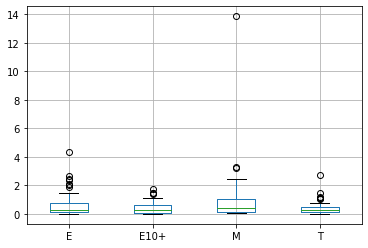

In [115]:
gr_score.boxplot()


### Вывод выделилась следующая взаимосвязь между различными видами рейтингов

1 Отсуствуют взаимосвязь с рейтингами  RP,K-A и AO

## Рассмотрю общие продажи по rating — рейтинг от организации ESRB

In [116]:
gr_rating3=df.pivot_table(index='rating',values='sales_sum', aggfunc='mean').sort_values(by='sales_sum', ascending=False)
gr_rating3

,sales_sum
rating,
M,1.007263
E,0.662781
E10+,0.457897
T,0.380240


In [117]:
gr_rating3=df.pivot_table(index='rating',values='sales_sum', aggfunc='sum').reset_index().sort_values(by='sales_sum')
gr_rating3

,rating,sales_sum
1,E10+,115.39
3,T,126.62
0,E,200.16
2,M,371.68


## Постройю диаграммы рассеяния и посчитайю корреляцию между отзывами(рейтингами) и продажами. 

Значение столбцов по которым буду анализировать

critic_Score — оценка критиков (максимум 100)

user_score — оценка пользователей (максимум 10)

rating — Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Зависимость общего рейтинга rating на sales_sum


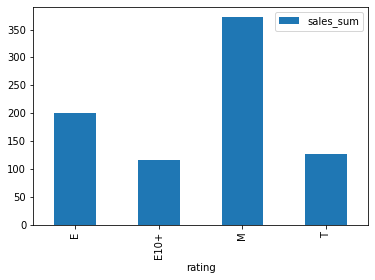

In [118]:
df_rating=df.pivot_table(index=['rating'],values='sales_sum',aggfunc='sum')
df_rating.plot(kind='bar')

In [119]:
df_rating=df_rating.reset_index()

### Вывод Самые лучшие продажи у рейтингов E,T,M

## Как оценки пользователей и критиков влияют на общий рейтинг

###  Расмотрим влияние жанров и рейтингов

In [120]:
df_ganre=df.pivot_table(index=['rating','genre'],values='sales_sum',aggfunc='count').reset_index().sort_values(by='sales_sum',ascending=False)
df_ganre.head(15)


,rating,genre,sales_sum
22,M,Action,160
8,E,Sports,129
28,M,Shooter,119
30,T,Action,107
10,E10+,Action,101
36,T,Role-Playing,73
27,M,Role-Playing,53
0,E,Action,51
5,E,Racing,50
32,T,Fighting,41


Расмотрю график по оси Х жанры по оси У суммарные продажи

rating,E,E10+,M,T
genre,,,,
Action,14.74,45.25,168.60,29.87
Adventure,1.55,2.33,7.58,0.59
Fighting,NaN,1.18,4.23,13.29
Misc,7.21,14.91,1.55,4.87
Platform,20.48,15.18,NaN,0.58
Puzzle,1.34,0.99,NaN,NaN
Racing,24.63,7.92,0.10,2.74
Role-Playing,1.67,2.66,39.78,22.52
Shooter,NaN,9.06,149.49,31.39


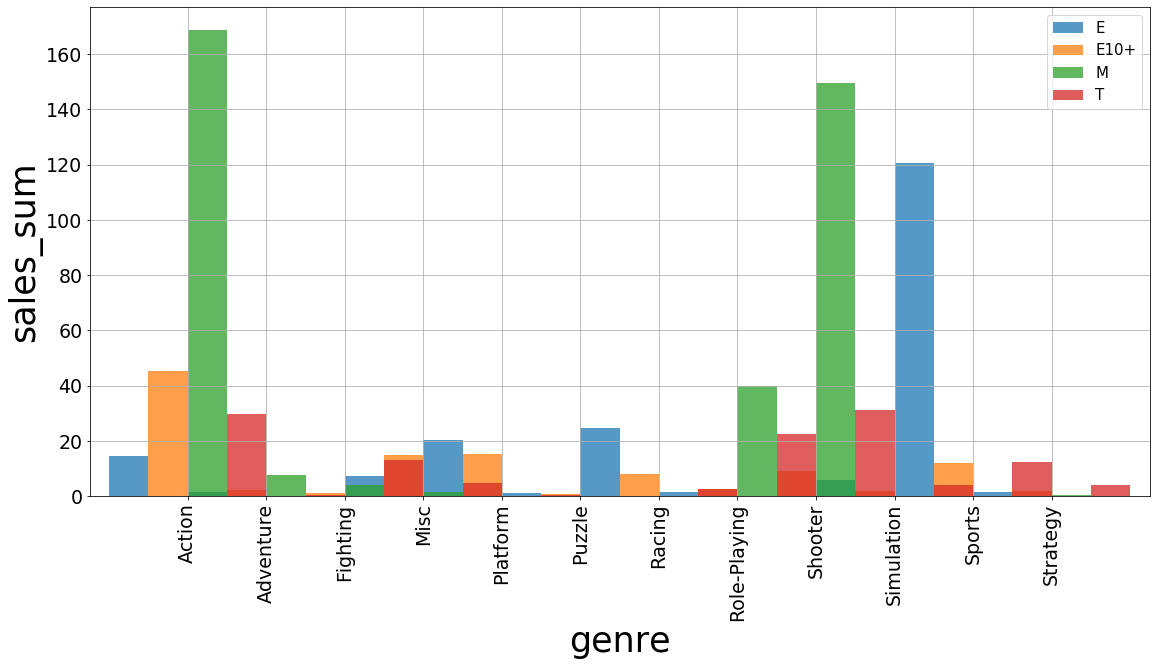

In [121]:
df_ganre_score=df.pivot_table(index=['genre'],values='sales_sum',columns='rating',aggfunc='sum')
df_ganre_score.plot(kind='bar', grid='True',figsize=(19, 9),width=2,alpha=0.75,fontsize=19)

plt.xlabel("genre",fontsize=35)
plt.ylabel("sales_sum",fontsize=35)
plt.legend(fontsize=15)
display(df_ganre_score)

Расмотрю график по оси Х рейтинги по оси У суммарные продажи

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
rating,,,,,,,,,,,,
E,51.0,2.0,NaN,14.0,25.0,5.0,50.0,2.0,NaN,16.0,129.0,8.0
E10+,101.0,19.0,3.0,29.0,35.0,5.0,11.0,10.0,16.0,4.0,15.0,4.0
M,160.0,26.0,4.0,4.0,NaN,NaN,2.0,53.0,119.0,NaN,NaN,1.0
T,107.0,13.0,41.0,17.0,5.0,NaN,4.0,73.0,26.0,11.0,24.0,12.0


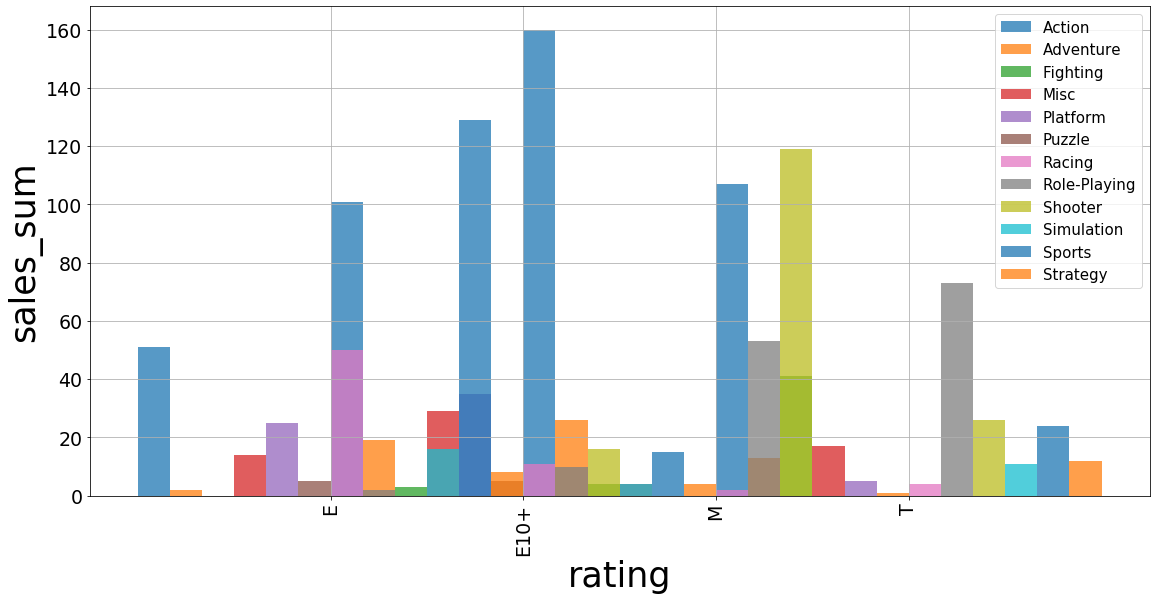

In [122]:
df_ganre_platform=df.pivot_table(index='rating',values='sales_sum',columns='genre',aggfunc='count')
df_ganre_platform.plot(kind='bar', grid='True',figsize=(19, 9),width=2,alpha=0.75,fontsize=19)
plt.legend(fontsize=15) 
plt.xlabel("rating",fontsize=35)
plt.ylabel("sales_sum",fontsize=35)
df_ganre_platform.head(5)

####  Вывод В рейтинги где хорошие продажи входит множество жанров,. Минимальное колличество жанров входят в рейтинги АО входит только жанр Action, а в рейтинг RP только жанр Strategy, в рейтинг K-A входит 2-ва жанра

### Оценки критиков и пользователей на общий рейтинг

#### Оценки критиков на общий рейтинг

In [123]:
df_rating_sum=df.pivot_table(index=['rating'],values='critic_score',aggfunc='sum').reset_index().sort_values(by='critic_score',ascending=False)
df_rating_sum

,rating,critic_score
2,M,23583.0
3,T,18758.0
0,E,14339.0
1,E10+,12212.0


#### Оценки пользователей на общий рейтинг

In [124]:
df_rating_sum=df.pivot_table(index=['rating'],values='user_score',aggfunc='sum').reset_index().sort_values(by='user_score',ascending=False)
df_rating_sum

,rating,user_score
2,M,2427.8
3,T,2175.2
0,E,1533.8
1,E10+,1410.7


#### Корреляция между оценкой критиков и общими продажами

In [125]:
df_rating_sum=df.pivot_table(index=['critic_score'],values='sales_sum',aggfunc='sum').reset_index().sort_values(by='sales_sum',ascending=False)
df_rating_sum.corr()

,critic_score,sales_sum
critic_score,1.000000,0.659248
sales_sum,0.659248,1.000000


#### Корреляция между оценкой пользователей и общими продажами

In [126]:
df_rating_sum=df.pivot_table(index=['user_score'],values='sales_sum',aggfunc='sum').reset_index().sort_values(by='sales_sum',ascending=False)
df_rating_sum.corr()

,user_score,sales_sum
user_score,1.00000,0.62721
sales_sum,0.62721,1.00000


## Вывод Различные рейтинги вносят различный вклад в общие продажи. Заметна хорошая корреляция между оценкой критиков и общими продажами, такое же влияние оказывают рейтинги Т, Е, М. Оценки пользователей по слабее влияют на общие продажи

# Посмотрю на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Зависимость платформ от жанров

In [127]:
df_ganre=df.pivot_table(index=['platform','genre'],values='sales_sum',aggfunc='count').reset_index().sort_values(by='sales_sum',ascending=False)
df_ganre

,platform,genre,sales_sum
40,ps4,Action,144
59,psv,Action,125
0,3ds,Action,116
28,ps3,Action,114
60,psv,Adventure,86
...,...,...,...
100,x360,Strategy,1
58,psp,Strategy,1
54,psp,Fighting,1
75,wii,Simulation,1


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3ds,116.0,27.0,7.0,32.0,15.0,9.0,NaN,62.0,1.0,15.0,8.0,11.0
ds,2.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
pc,50.0,11.0,2.0,4.0,2.0,NaN,16.0,18.0,32.0,21.0,13.0,20.0
ps3,114.0,29.0,24.0,18.0,9.0,1.0,13.0,49.0,31.0,6.0,47.0,4.0
ps4,144.0,28.0,18.0,20.0,12.0,1.0,19.0,51.0,41.0,6.0,46.0,6.0
psp,12.0,33.0,1.0,8.0,NaN,NaN,NaN,7.0,NaN,NaN,5.0,1.0
psv,125.0,86.0,10.0,19.0,6.0,2.0,3.0,78.0,2.0,3.0,17.0,7.0
wii,8.0,1.0,NaN,7.0,2.0,NaN,NaN,NaN,NaN,1.0,3.0,1.0
wiiu,48.0,3.0,4.0,18.0,15.0,4.0,2.0,5.0,8.0,1.0,5.0,2.0


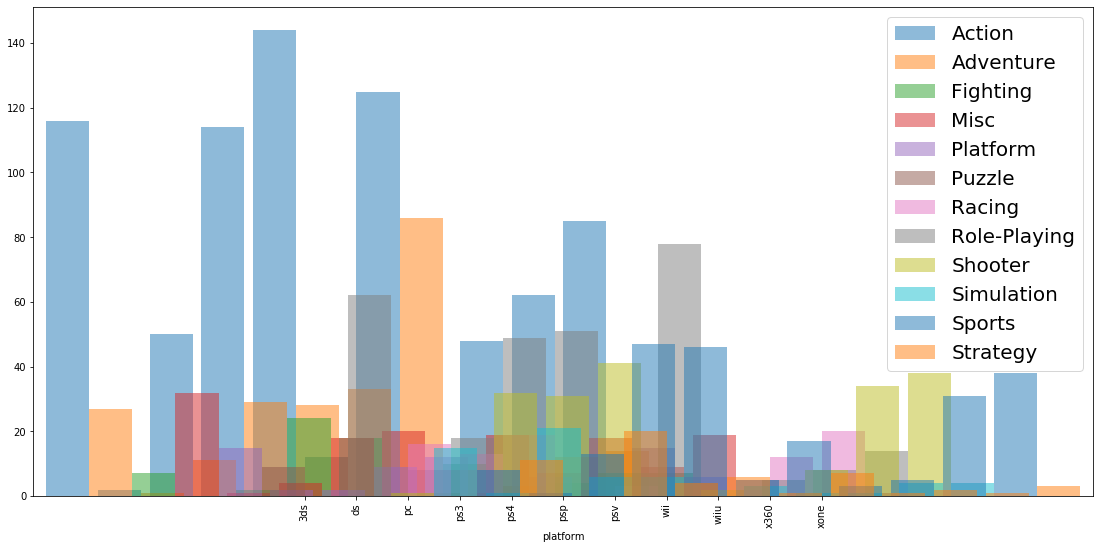

In [128]:
df_ganre_platform=df.pivot_table(index='platform',values='sales_sum',columns='genre',aggfunc='count')

df_ganre_platform.plot(kind='bar',figsize=(19, 9),width=10 ,alpha=0.5 )
plt.legend(fontsize=20) 

#df_ganre_platform.head(5)
df_ganre_platform

### Вывод в одной платформе может быть несколько жанров, при этом имеются платформы которые включают все жанры такие как 3DS, DS,GBA  и т.д или минимальное кол-во жанров у платформ WS,TG16

## Влияние жанров на продажи

Вывиду Жанры в порядке убывания по общим продажам

In [129]:
df_ganre_table=df.pivot_table(index=['genre'],values='sales_sum',aggfunc='sum').reset_index().sort_values(by='sales_sum',ascending=False)

In [130]:
df_ganre_table.head(15)

,genre,sales_sum
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


посмотрю как продажы по различным жанром распределяются по годам

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2013.0,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
2014.0,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015.0,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016.0,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


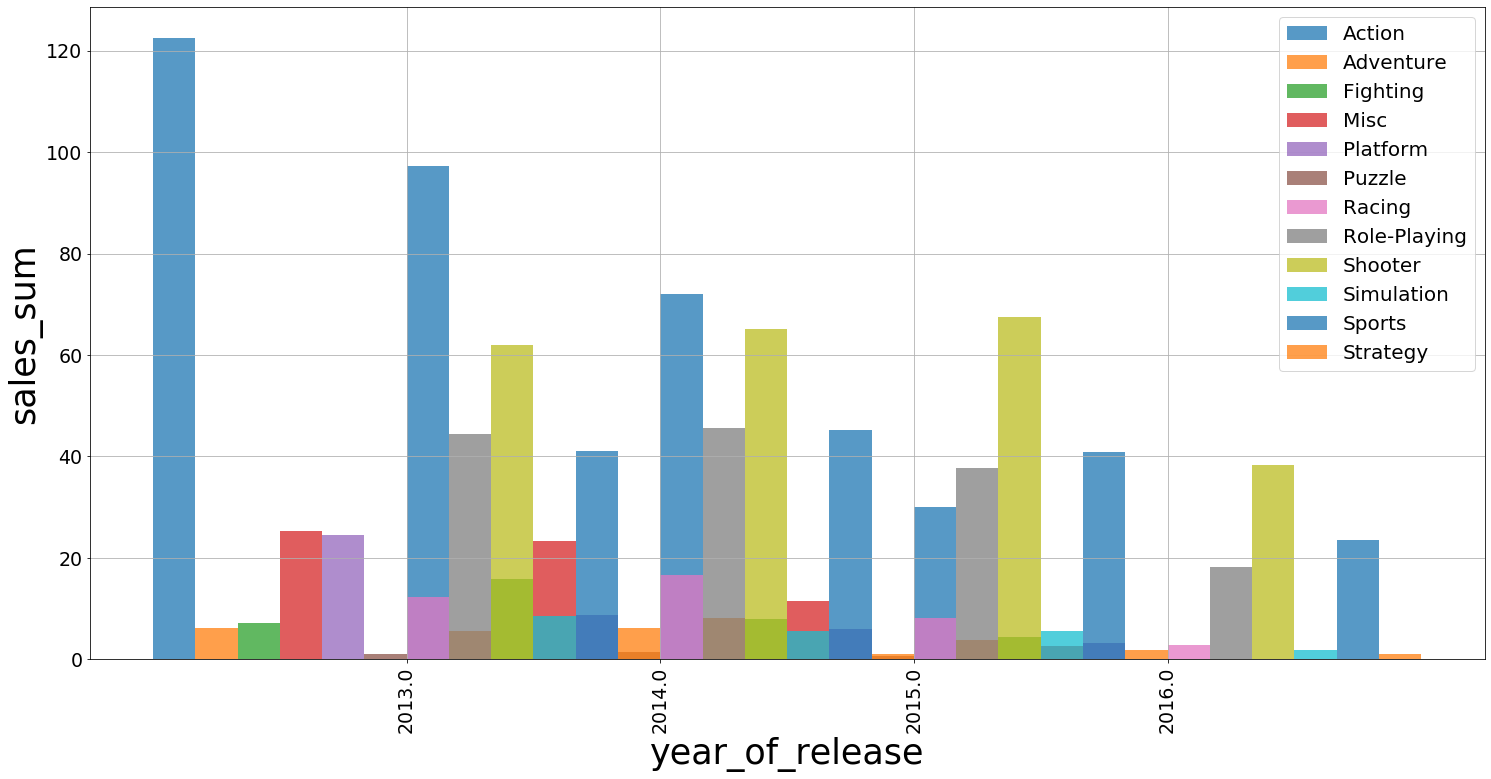

In [131]:
df_ganre=df.pivot_table(index='year_of_release',values='sales_sum',columns='genre',aggfunc='sum')
df_ganre.plot(kind='bar', grid='True',figsize=(25, 12),width=2,alpha=0.75,fontsize=19)

plt.xlabel("year_of_release",fontsize=35)
plt.ylabel("sales_sum",fontsize=35)
plt.legend(fontsize=20) 
display(df_ganre)


### Вывод ТОП5 по ханрам Action,Sports,Shooter,Role-Playing, Misc	жанры сильно влияют на продажи 
худшие продажи у жанров Adventure,Strategy и Puzzle

## Сравню платформы из ТОП 5 с жанрами

In [132]:
df_platform_genre=df_sales_sum.pivot_table(index=['platform','genre'],values='sales_sum',aggfunc='mean').reset_index()
df_platform_genre['platform'].unique()

array(['3ds', 'ps3', 'ps4', 'x360', 'xone'], dtype=object)

In [138]:
#df_platform_genre.query('platform=="ds"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7,edgecolor='yellow')
#df_platform_genre.query('platform=="ps2"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7)
#df_platform_genre.query('platform=="ps3"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7)
#df_platform_genre.query('platform=="wii"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7)
#df_platform_genre.query('platform=="x360"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7)
#plt.legend()

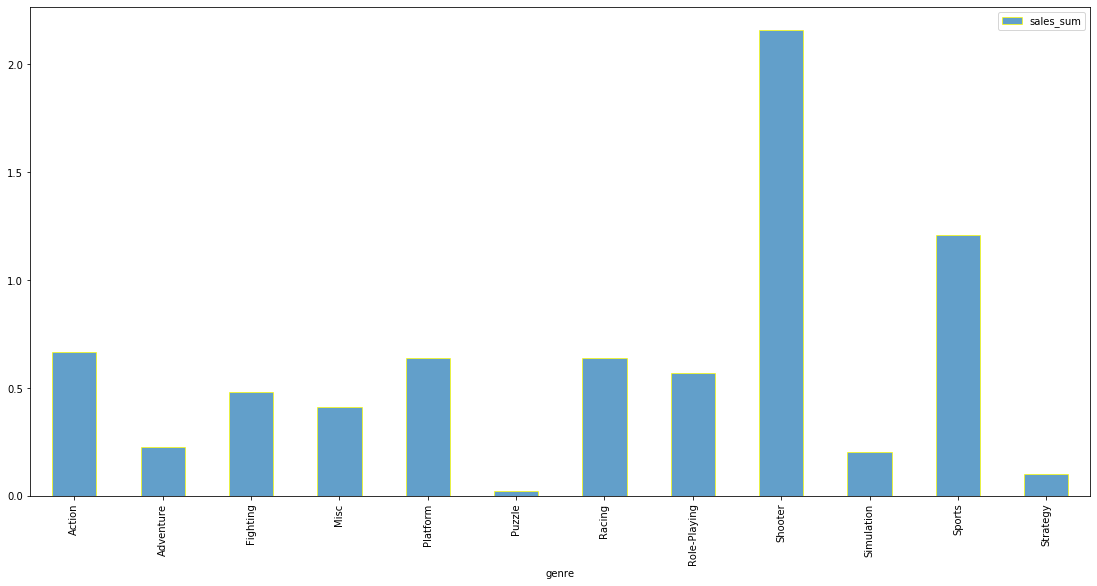

In [139]:
df_platform_genre.query('platform=="ps4"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7,edgecolor='yellow')


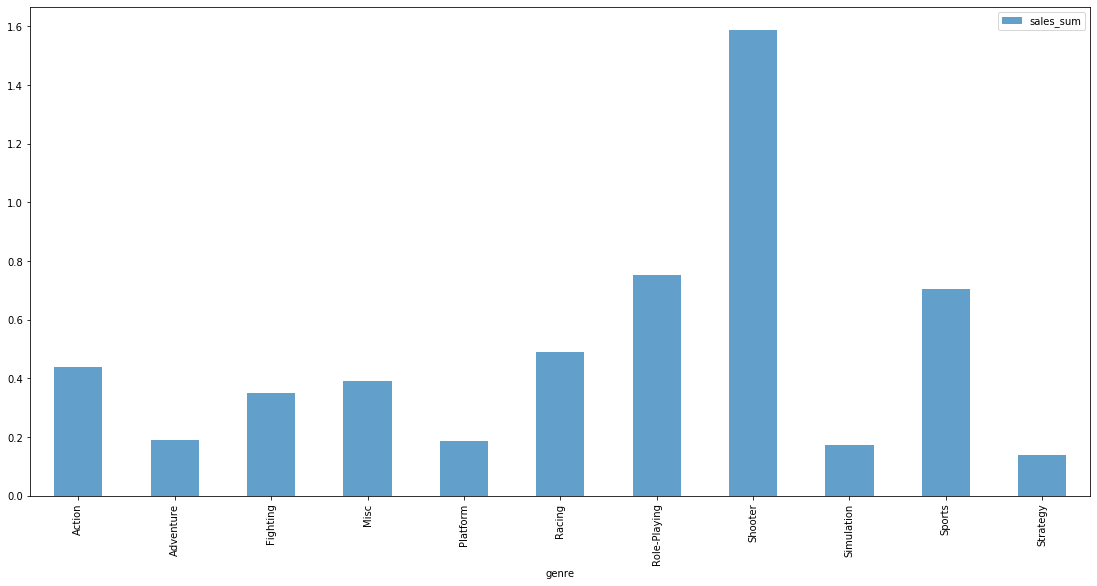

In [140]:
df_platform_genre.query('platform=="xone"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7)


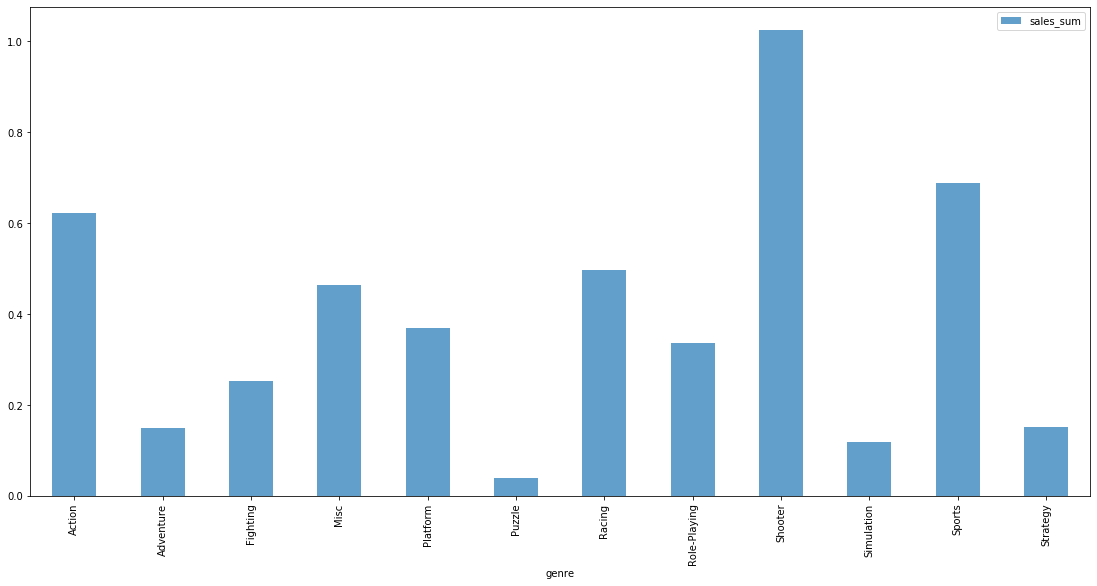

In [141]:
df_platform_genre.query('platform=="ps3"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7)


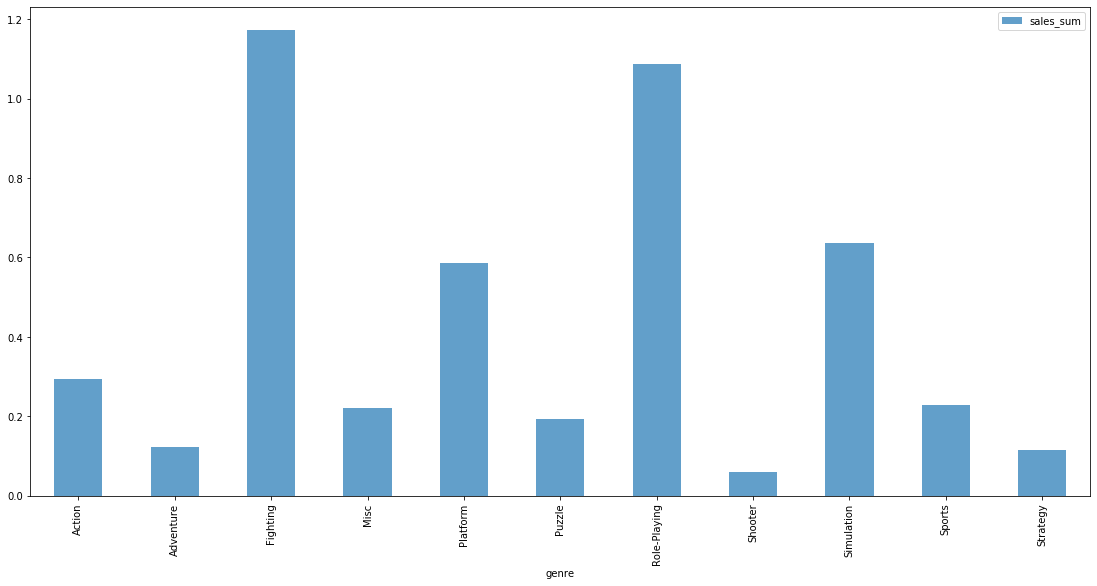

In [142]:
df_platform_genre.query('platform=="3ds"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7)


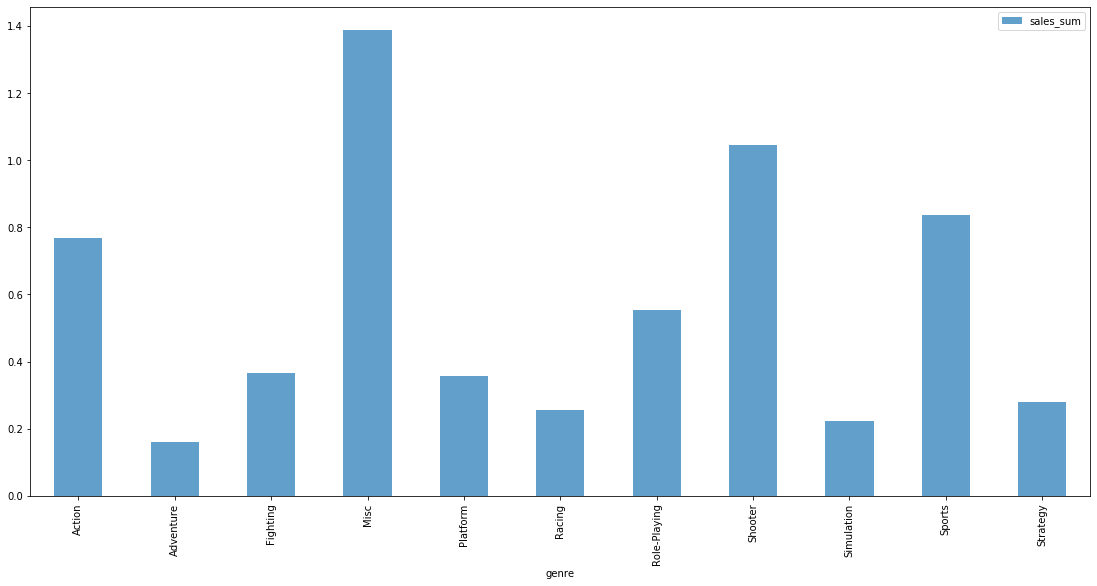

In [143]:
df_platform_genre.query('platform=="x360"').plot(kind='bar',x='genre',y='sales_sum',figsize=(19, 9),alpha=0.7)

### Вывод у платформ ps3,xone,ps4 хорошо идут жанры Shooter У платформы x360, хорошо продаются жанры Misc У платформы 3ds хорошо идут 2-ва жанра Fighting и Role-Playing и

In [146]:
df_platform_genre=df_sales_sum.pivot_table(index=['platform'],values='sales_sum',columns='genre',aggfunc='sum').reset_index()
df_platform_genre

genre,platform,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,3ds,34.04,3.33,8.21,7.10,8.79,1.73,NaN,67.37,0.06,9.53,1.82,1.27
1,ps3,70.92,4.32,6.05,8.36,3.33,0.04,6.46,16.49,31.79,0.71,32.35,0.61
2,ps4,96.10,6.34,8.65,8.19,7.69,0.02,12.14,28.99,88.56,1.23,55.61,0.62
3,x360,47.59,1.92,2.55,12.49,2.14,NaN,3.07,4.43,35.48,0.89,25.96,0.28
4,xone,37.31,2.68,2.45,7.43,0.93,NaN,9.79,10.55,60.33,0.69,26.74,0.42


# Составлю портрет пользователя для каждого региона Определите для пользователя каждого региона (NA, EU, JP)

Для того что бы составить партрет пользователей разных стран, нужно посмотреть как распределяются жанры, платформы, оценки, рейтинги и продажи

## Зависимость жанров от регионов круговая диаграмма

In [147]:
df_portrait_user=df.pivot_table(index='genre',values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')


In [148]:
df_portrait_user=df_portrait_user.reset_index()


In [149]:
df_portrait_user.sort_values(by='other_sales',ascending=False)

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,118.13,40.49,126.05,37.20
8,Shooter,87.86,6.61,109.74,28.77
10,Sports,60.52,5.41,65.27,19.45
7,Role-Playing,36.97,51.04,46.40,11.48
3,Misc,20.04,9.20,27.49,6.09
6,Racing,20.19,2.30,12.96,4.44
4,Platform,15.58,4.79,18.14,4.12
2,Fighting,8.55,7.65,15.55,3.56
1,Adventure,8.25,5.82,7.14,2.43
9,Simulation,10.92,4.52,4.86,1.46


Распределение продаж жанров по Европе

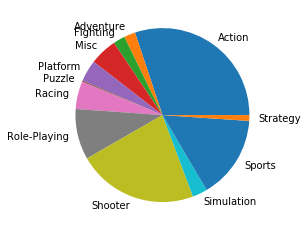

In [150]:
mylabels =df_portrait_user['genre']
plt.pie(df_portrait_user['eu_sales'],labels = mylabels)
plt.show()


Распределение продаж жанров по Японии

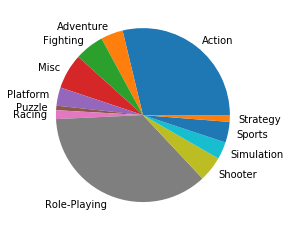

In [151]:
mylabels =df_portrait_user['genre']
plt.pie(df_portrait_user['jp_sales'],labels = mylabels)
plt.show()

Распределение продаж жанров по Северной Америке

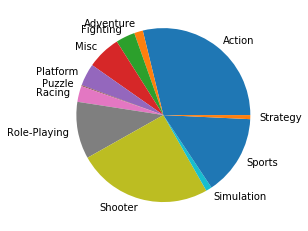

In [152]:
mylabels =df_portrait_user['genre']
plt.pie(df_portrait_user['na_sales'],labels = mylabels)
plt.show()

Распределение продаж жанров в других странах

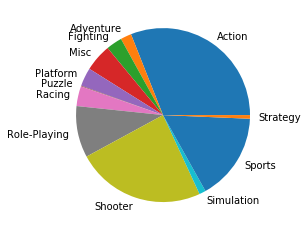

In [153]:
mylabels =df_portrait_user['genre']
plt.pie(df_portrait_user['other_sales'],labels = mylabels)
plt.show()

### Вывод самые популярные жанры 

в eu_sales это Action , Sports , Shooter

в jp_sales Role-Playing,Action

в na_sales Action, Sports, Shooter, 

в other_sales Action, Sports, Shooter, 

Во всех регионах хорошо продается жанр Action и в 4-х регионах из 5-ти
Sports, Shooter. На основании этого делаю вывод, что регионы похожи по жанрам
eu_sales,na_sales,other_sales

## Зависимость платформ от регионов круговая диаграмма

In [155]:
df_platform_user=df.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')

In [156]:
df_platform_user=df_platform_user.reset_index()


In [157]:
df_platform_user.sort_values(by='other_sales',ascending=False)

,platform,eu_sales,jp_sales,na_sales,other_sales
4,ps4,141.09,15.96,108.74,48.35
3,ps3,67.81,23.35,63.50,26.77
10,xone,51.59,0.34,93.12,14.27
9,x360,42.52,0.51,81.66,12.11
0,3ds,30.96,67.81,38.20,6.28
8,wiiu,19.85,10.88,29.21,4.69
6,psv,6.10,18.59,5.04,3.26
2,pc,25.36,0.00,11.11,2.96
7,wii,5.93,0.05,6.56,1.12
1,ds,0.85,0.00,0.57,0.12


In [162]:
df_platform_user['platform'].unique()

array(['3ds', 'ds', 'pc', 'ps3', 'ps4', 'psp', 'psv', 'wii', 'wiiu',
       'x360', 'xone'], dtype=object)

Распределение продаж платформ в Европе

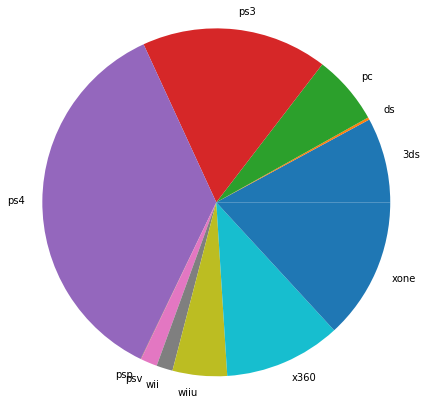

In [158]:
mylabels =df_platform_user['platform']
plt.pie(df_platform_user['eu_sales'],labels = mylabels,radius=2,
    )
plt.show()

Распределение продаж платформ в Японии

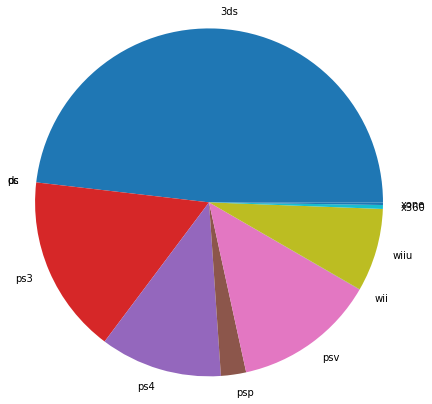

In [159]:
mylabels =df_platform_user['platform']
plt.pie(df_platform_user['jp_sales'],labels = mylabels,radius=2,
    )
plt.show()

Распределение продаж платформ в Северной Америке

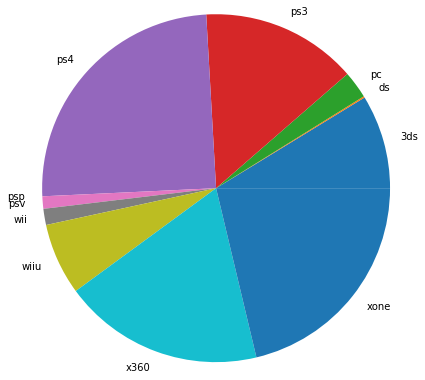

In [160]:
mylabels =df_platform_user['platform']
plt.pie(df_platform_user['na_sales'],labels = mylabels,radius=2,
    )
plt.show()

Распределение продаж платформ в Других странах

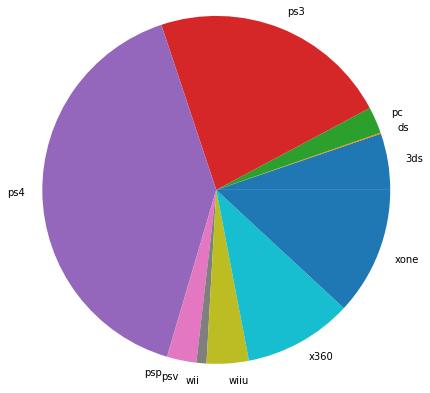

In [161]:
mylabels =df_platform_user['platform']
plt.pie(df_platform_user['other_sales'],labels = mylabels,radius=2,
    )
plt.show()

### Вывод по продажам платформ в различных регионах

в eu_sales ps4,ps3,x360,xone

в jp_sales 3ds,ps3,ps4

в na_sales xone,x360,ps4,3ds

в other_sales ps4,ps3,x360,xone

Платформа ps4 хорошо продается во всех регионах, 3ds хорошо идет в 
na_sales, jp_sales, а платформы x360,xone хорошо идут в other_sales идет
eu_sales


## Зависимость рейтингов критиков от регионов круговая диаграмма

In [163]:
df_critic_score=df.pivot_table(index='critic_score',values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')
df_critic_score=df_critic_score.reset_index()
df_critic_score.sort_values(by='eu_sales',ascending=False)

,critic_score,eu_sales,jp_sales,na_sales,other_sales
70,97.0,22.73,1.42,23.45,7.81
55,82.0,17.01,0.86,12.18,4.36
59,86.0,15.82,4.75,18.14,5.03
53,80.0,15.42,2.85,19.63,5.47
58,85.0,14.79,1.16,9.38,3.79
...,...,...,...,...,...
10,35.0,0.04,0.00,0.05,0.00
13,39.0,0.02,0.00,0.09,0.01
6,31.0,0.02,0.00,0.00,0.00
5,26.0,0.01,0.00,0.01,0.00


Распределение продаж в Европе в зависимости от рейтингов критиков

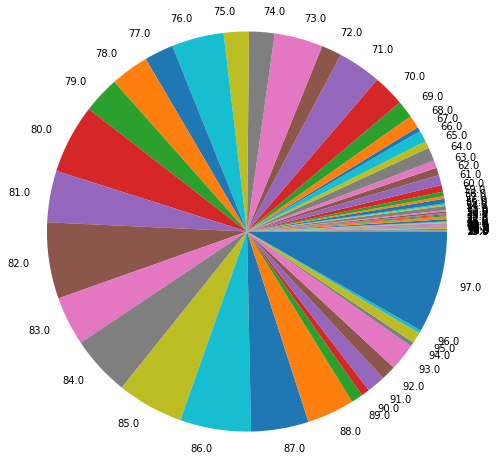

In [164]:
mylabels =df_critic_score['critic_score']
plt.pie(df_critic_score['eu_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

Распределение продаж в Японии в зависимости от рейтингов критиков

Распределение продаж в других странах в зависимости от рейтингов критиков

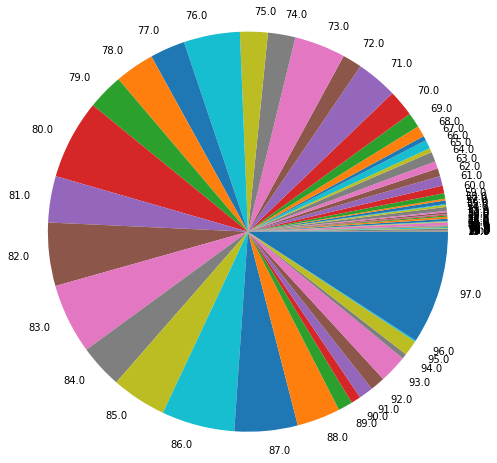

In [165]:
mylabels =df_critic_score['critic_score']
plt.pie(df_critic_score['other_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

Распределение продаж в Северной Америке в зависимости от рейтингов критиков

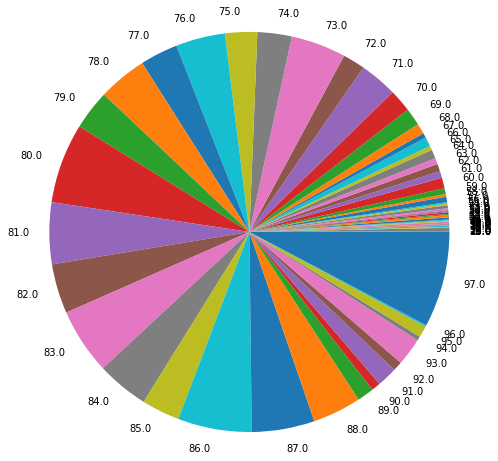

In [166]:
mylabels =df_critic_score['critic_score']
plt.pie(df_critic_score['na_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

Распределение продаж в Японии в зависимости от рейтингов критиков

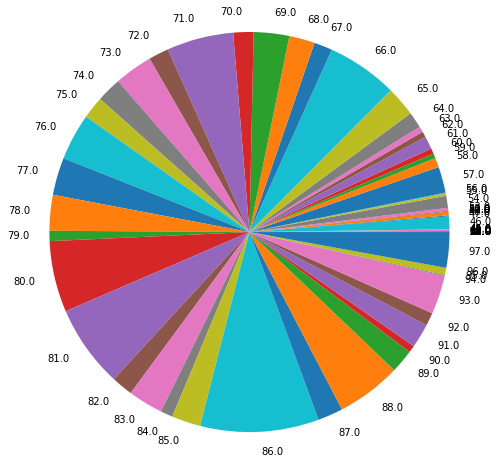

In [167]:
mylabels =df_critic_score['critic_score']
plt.pie(df_critic_score['jp_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

### Вывод большой рейтинг от критиков и пользователей еще не означет хорошие продажи,

## Зависимость продах от рейтингов пользователей по  регионам  Круговая диаграмма

In [168]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
16,Grand Theft Auto V,ps3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,x360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,ps4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3ds,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,ps4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,psv,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [169]:
df_user_score=df.pivot_table(index='user_score',values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')
df_user_score=df_user_score.reset_index()
df_user_score.sort_values(by='eu_sales',ascending=False)

,user_score,eu_sales,jp_sales,na_sales,other_sales
72,8.2,15.62,3.26,13.54,5.84
69,7.9,14.51,2.33,16.43,4.33
71,8.1,14.07,2.21,17.52,4.52
33,4.3,13.20,0.19,4.82,3.30
67,7.7,10.79,1.84,10.97,3.65
...,...,...,...,...,...
1,0.7,0.02,0.00,0.14,0.02
0,0.2,0.02,0.00,0.07,0.02
3,1.3,0.01,0.00,0.04,0.01
2,1.0,0.01,0.00,0.02,0.01


Распределение продаж в других странах в зависимости от рейтингов пользователей

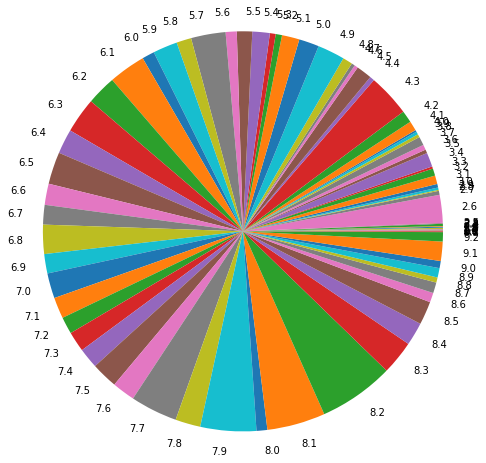

In [170]:
mylabels =df_user_score['user_score']
plt.pie(df_user_score['other_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

Распределение продаж в Северной Америки в зависимости от рейтингов пользователей

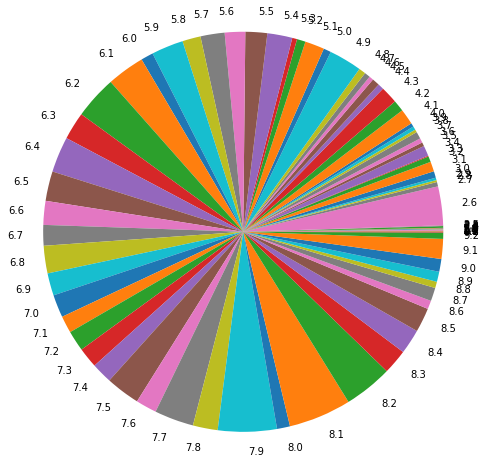

In [171]:
mylabels =df_user_score['user_score']
plt.pie(df_user_score['na_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

Распределение продаж в Японии в зависимости от рейтингов пользователей

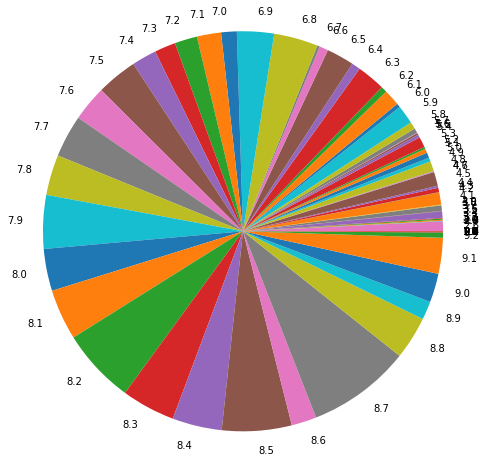

In [172]:
mylabels =df_user_score['user_score']
plt.pie(df_user_score['jp_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

Распределение продаж в Европе в зависимости от рейтингов пользователей

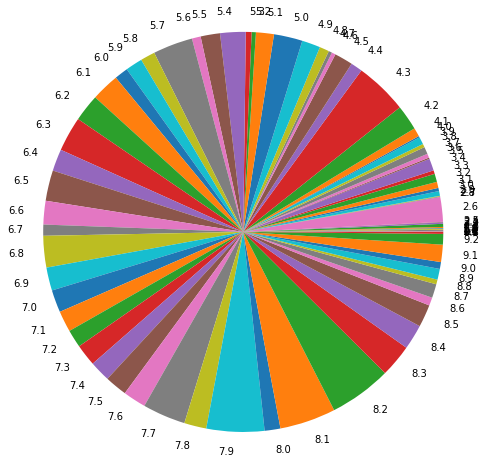

In [173]:
mylabels =df_user_score['user_score']
plt.pie(df_user_score['eu_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

#### Вывод хорошие продажи не сильно зависят от оценки пользователей,

### Зависимость продаж от международних рейтингов от регионов

In [174]:
df_rating_score=df.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')
df_rating_score=df_rating_score.reset_index()
df_rating_score.sort_values(by='eu_sales',ascending=False)

,rating,eu_sales,jp_sales,na_sales,other_sales
2,M,145.32,14.11,165.21,47.04
0,E,83.36,15.14,79.05,22.61
1,E10+,42.69,5.89,54.24,12.57
3,T,41.95,20.59,49.79,14.29


Распределение продаж в других странах в зависимости от международнего рейтинга

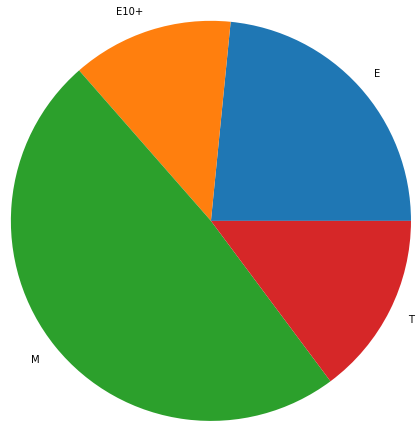

In [175]:
mylabels =df_rating_score['rating']
plt.pie(df_rating_score['other_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

Распределение продаж в Северной Америке в зависимости от международнего рейтинга

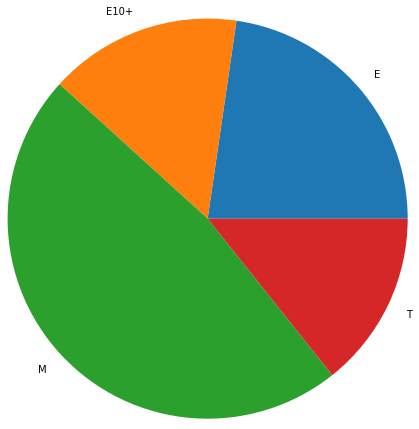

In [176]:
mylabels =df_rating_score['rating']
plt.pie(df_rating_score['na_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

Распределение продаж в Японии в зависимости от международнего рейтинга

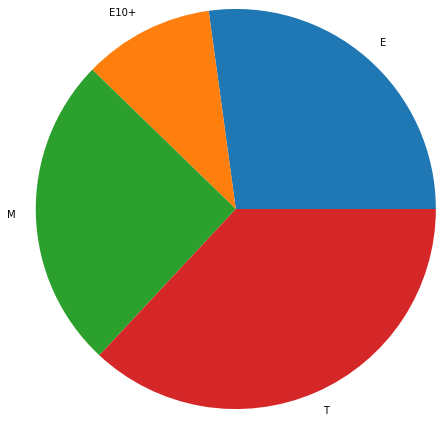

In [177]:
mylabels =df_rating_score['rating']
plt.pie(df_rating_score['jp_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

Распределение продаж в Европе в зависимости от международнего рейтинга

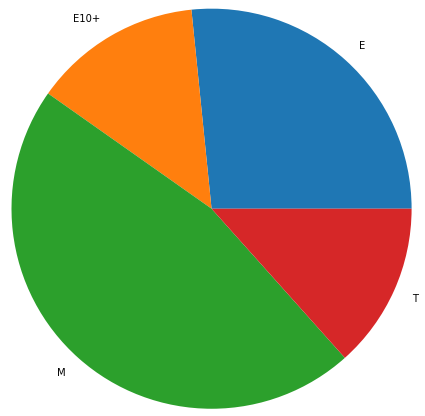

In [178]:
mylabels =df_rating_score['rating']
plt.pie(df_rating_score['eu_sales'],labels = mylabels,radius=2.3,
    )
plt.show()

#### Вывод в jp_sales преобладает рейтинг Т в отличие от других стран где преобладает рейтинг М

## Вывод портрет пользователей сильно завист от регионов

В Японии продажи жанров Role-Playing координально отличатеся от продаж в других странах
По Жанрам Северная Америка, другие страны и Европа схожи, при этом сильно отличаются от Японии

По платформам хорошо продается 3ds в Японии и Северная Америке, а в Европе и Других странах хорошо продается платформа x360,xone. При этом во всех регионах хорошо продается платформа ps4 

Рейтинги по регионам практически одинаковы, только в Японии преобладает рейтинг Т, а в других регионах рейтинг М

# Проверю гипотезу Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые¶

Н1- Средние пользовательские рейтинги платформ Xbox One и PC различаются

Критический уровень критической значимости 5%, что бы вероятность правильности вывода была 95% и больше

In [ ]:
df

In [184]:
df.pivot_table(index='platform',values='user_score',aggfunc='mean')

,user_score
platform,
3ds,6.976250
ds,4.800000
pc,6.269677
ps3,6.348387
ps4,6.748249
psp,5.850000
psv,7.527273
wii,5.257143
wiiu,7.017500


### Выделю значение рейтингов значения user_score для различных платформ Xbox One и PC

In [185]:
platform=df['platform'].unique()
#platform.sort()
platform


array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

In [186]:
df_xbox=df.query('platform=="xb"')


In [187]:
df_pc=df.query('platform=="pc"')
df_pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
458,The Sims 4,pc,2014.0,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1095,StarCraft II: Heart of the Swarm,pc,2013.0,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
1351,SimCity (2013),pc,2013.0,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
1437,Battlefield 4,pc,2013.0,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
1530,Fallout 4,pc,2015.0,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16509,Ride 2,pc,2016.0,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
16518,Rugby World Cup 2015,pc,2015.0,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01
16617,Codename: Panzers Complete Collection,pc,2016.0,Strategy,0.00,0.01,0.0,0.00,NaN,NaN,NaN,0.01
16631,The Amazing Spider-Man 2 (2014),pc,2014.0,Action,0.00,0.01,0.0,0.00,NaN,NaN,NaN,0.01


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null float64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1192 non-null float64
rating             1256 non-null object
sales_sum          2233 non-null float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


Отфильтрую значение NaN

In [189]:
df_xbox=df_xbox.query('user_score!="NaN"')

In [190]:
# Проверю как отфильтровал
df_xbox.query('user_score=="NaN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum


In [191]:
xbox_user_score=df_xbox['user_score']
xbox_user_score

Series([], Name: user_score, dtype: float64)

In [192]:
pc_user_score=df_pc.query('user_score!="NaN"')['user_score']
pc_user_score

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 155, dtype: float64

In [193]:
#xbox_user_score=xbox_user_score.fillna(0)
#pc_user_score=pc_user_score.fillna(0)

In [194]:
xbox_user_score

Series([], Name: user_score, dtype: float64)

In [195]:
sample_1 = xbox_user_score
sample_2 =pc_user_score

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
     equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу


### Вывод Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

# Проверю гипотезу средние продажи платформ Xbox One и PC одинаковые

H0- средние продажи платформ Xbox One и PC одинаковые¶

Н1- средние продажи платформ Xbox One и PC различаются

Критический уровень критической значимости 5%, что бы вероятность правильности вывода была 95% и больше

In [196]:
df_xbox

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum


In [197]:
xbox_sales_sum=df_xbox['sales_sum']
pc_sales_sum=df_pc['sales_sum']

In [198]:
xbox_sales_sum=xbox_sales_sum.fillna(0)
pc_sales_sum=pc_sales_sum.fillna(0)

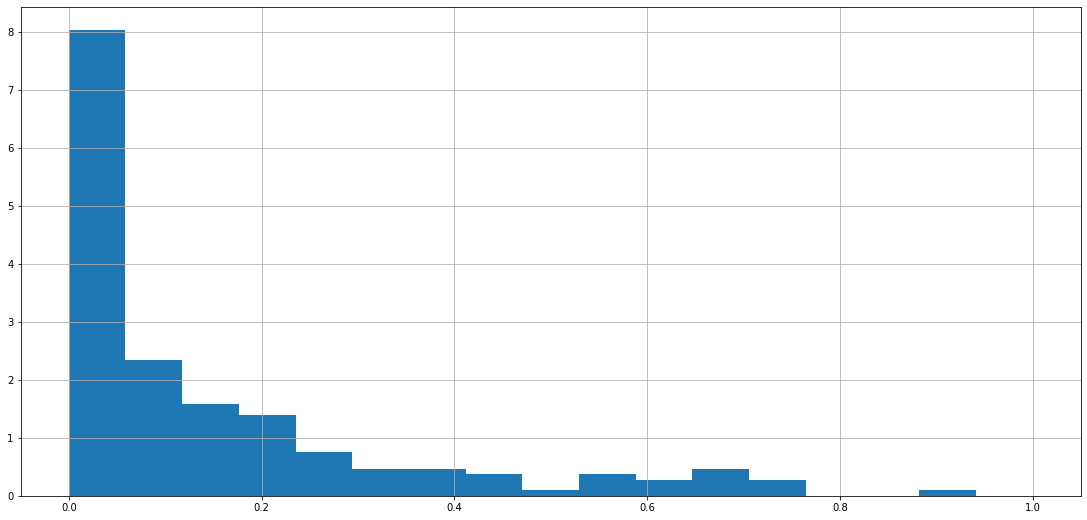

In [199]:
#df_groupby_gb_ultra=df_calls_internet_messages_users_info2_ultra.groupby(['user_id','month'])['gb_used'].mean()
pc_sales_sum.hist(density=True,figsize=(19, 9),bins='auto',range=(0,1))

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


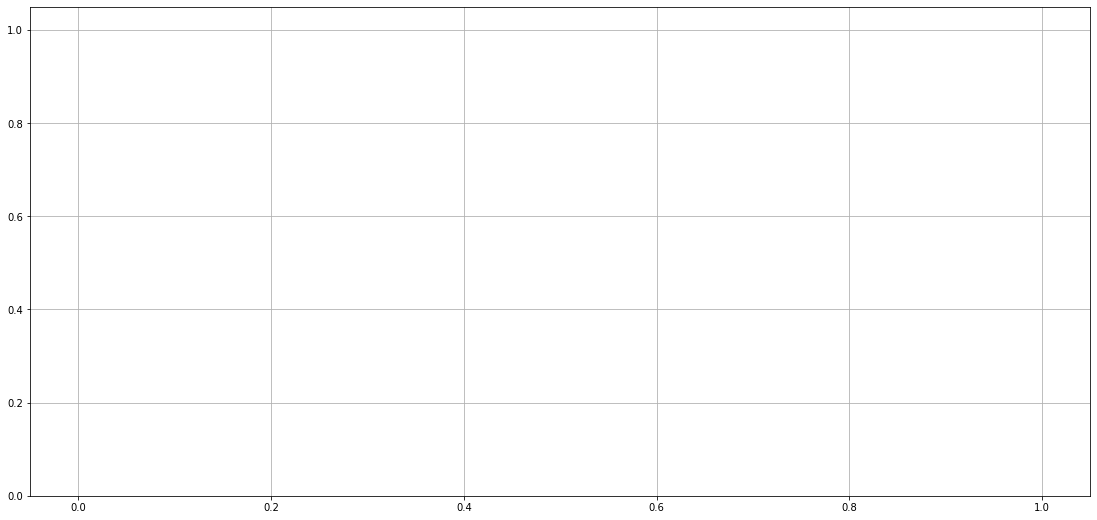

In [200]:
xbox_sales_sum.hist(density=True,figsize=(19, 9),bins='auto',range=(0,1))

In [201]:
sample_1 = xbox_sales_sum
sample_2 =pc_sales_sum

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
     equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу


### Вывод Не получилось отвергнуть нулевую гипотезу средние продажи платформ Xbox One и PC одинаковые

# Проверю гипотезу cредние пользовательские рейтинги жанров Action и Sports разные.

H0-  cредние пользовательские рейтинги жанров Action и Sports одинаковые

Н1-  cредние пользовательские рейтинги жанров Action и Sports разные.

Критический уровень критической значимости 5%, что бы вероятность правильности вывода была 95% и больше

In [202]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
16,Grand Theft Auto V,ps3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,x360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,ps4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3ds,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,ps4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,psv,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,psv,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [203]:
df_action=df.query('genre=="Action"')
df_sports=df.query('genre=="Sports"')

In [204]:
action_genre=df_xbox['user_score']
sports_genr=df_pc['user_score']

In [205]:
action_genre=action_genre.fillna(0)
sports_genr=sports_genr.fillna(0)

In [206]:
sample_1 = action_genre
sample_2 =sports_genr

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
     equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу


### Вывод не получилось отвергнуть гипотезу cредние пользовательские рейтинги жанров Action и Sports разные

## Зависимость рейтингов от продаж

In [207]:
gr_score=df.pivot_table(index='user_score',values='sales_sum',columns='rating', aggfunc='mean')
gr_score

rating,E,E10+,M,T
user_score,,,,
0.2,0.1100,NaN,NaN,NaN
0.7,0.1800,NaN,NaN,NaN
1.0,NaN,NaN,0.040,NaN
1.3,NaN,NaN,0.060,NaN
1.4,0.0100,NaN,0.020,NaN
...,...,...,...,...
8.9,1.3475,NaN,0.800,0.44
9.0,4.3200,2.34,0.410,0.02
9.1,7.0900,NaN,5.860,NaN


# Заключение 

Оценивал данные с 2013года. Выделил самые популярные платформы ps4,ps3,xone,3ds,x360.

У рейтингов критиков, рейтинг от организации ESRB нормальная корреляция с продажами, у рейтингов пользователей по слабее. Чем лучше рейтинг у платформ, тем больше жанров. Так же имеются популярные жанры, которые сильно влияют на продажи такие как Action


Так же подтвердил гипотезы: 
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

2) Средние пользовательские рейтинги жанров Action и Sports одинаковые

